# Dissecting PubMed
## Which content is covered by the Library? and Open Access?
#### Floriane Muller & Pablo Iriarte, Geneva University Library, Switzerland


## Merging the 3 PMIDs / DOIs sources

Rows with DOI (deduped)

 1. PubMed: 11932272
 2. EUPMC: 17834276
 3. PubMed merged with Crossref by APD / Title method: 17194540

In [ ]:
# Open PubMed file
import pandas as pd
myfilein = 'data/results/pubmed_source_dois.csv.gz'
df_pubmed = pd.read_csv(myfilein, sep='\t', header=0, encoding='utf-8', compression='gzip')
# set index
# df_pubmed = df_pubmed.set_index('pmid')
# add column to track provenence
df_pubmed['doi_pubmed'] = 1
df_pubmed

In [ ]:
df_pubmed.shape

In [ ]:
# dedup just in case
df_pubmed_dedup = df_pubmed.drop_duplicates(subset=['pmid', 'doi'])
df_pubmed_dedup.shape

In [ ]:
# check dups
df_pubmed_dups = df_pubmed.loc[df_pubmed.duplicated(subset=['pmid', 'doi'], keep=False)]
df_pubmed_dups

In [ ]:
# Open EU PMC file
myfilein = 'data/results/eupmc_source_dois.csv.gz'
df_eupmc = pd.read_csv(myfilein, sep='\t', header=0, encoding='utf-8', compression='gzip')
# set index
# df_eupmc = df_eupmc.set_index('pmid')
# add column to track provenence
df_eupmc['doi_eupmc'] = 1
df_eupmc


In [ ]:
df_eupmc.shape

In [ ]:
# dedup just in case
df_eupmc_dedup = df_eupmc.drop_duplicates(subset=['pmid', 'doi'])
df_eupmc_dedup.shape

In [ ]:
# check dups
df_eupmc_dups = df_eupmc.loc[df_eupmc.duplicated(subset=['pmid', 'doi'], keep=False)]
df_eupmc_dups

In [ ]:
# Open APD file
myfilein = 'data/results/apd_source_dois_all.csv.gz'
df_apd = pd.read_csv(myfilein, sep='\t', header=0, encoding='utf-8', compression='gzip')
# set index
# df_apd = df_apd.set_index('pmid')
# add column to track provenence
df_apd['doi_apd'] = 1
df_apd

In [ ]:
df_apd.shape

In [ ]:
# dedup just in case
df_apd_dedup = df_apd.drop_duplicates(subset=['pmid', 'doi'])
df_apd_dedup.shape

In [ ]:
# check dups
df_apd_dups = df_apd.loc[df_apd.duplicated(subset=['pmid', 'doi'], keep=False)]
df_apd_dups

In [ ]:
# append EUPMC and PubMed
df_all = df_eupmc_dedup.merge(df_pubmed_dedup, on=['pmid', 'doi'], how='outer')

In [ ]:
# append APD
df_all = df_all.merge(df_apd_dedup, on=['pmid', 'doi'], how='outer')

In [ ]:
# count
df_all.shape

In [ ]:
# dedup the final merge
df_all_dedup = df_all.drop_duplicates(subset=('pmid', 'doi'))
df_all_dedup.shape

In [ ]:
df_all_dedup.sort_values(by='pmid').to_csv('data/results/pmid_dois_pubmed_eupmc_apd_merged.csv.gz', sep='\t', index=False, encoding='utf-8', compression='gzip')
df_all_dedup

In [1]:
# restart kernel (memory full)
# merge all PMIDs and years to DOIs dataframe
# Open merged file
import pandas as pd
myfilein = 'data/results/pmid_dois_pubmed_eupmc_apd_merged.csv.gz'
df = pd.read_csv(myfilein, sep='\t', header=0, encoding='utf-8', compression='gzip')
df

pmid                                 doi  doi_eupmc  doi_pubmed  \
0                1        10.1016/0006-2944(75)90147-7        1.0         NaN   
1                2        10.1016/0006-291x(75)90482-9        1.0         NaN   
2                3        10.1016/0006-291x(75)90498-2        1.0         NaN   
3                4        10.1016/0006-291x(75)90506-9        1.0         NaN   
4                5        10.1016/0006-291x(75)90508-2        1.0         NaN   
5                6        10.1016/0006-291x(75)90518-5        1.0         NaN   
6                7        10.1016/0006-2952(75)90020-9        1.0         NaN   
7                8        10.1016/0006-2952(75)90029-5        1.0         NaN   
8                9        10.1016/0006-2952(75)90080-5        1.0         NaN   
9               10                   10.1002/mrd.21098        1.0         NaN   
10              10        10.1016/0006-2952(75)90094-5        1.0         NaN   
11              11        10.1016/0006-2952(75)90001-5        1.0         NaN   
12              12        10.1016/0006-2952(75)90002-7        1.0         NaN   
13              13        10.1016/0006-2952(75)90009-x        1.0         NaN   
14              14        10.1016/0006-2952(75)90011-8        1.0         NaN   
15              15        10.1016/0006-2952(75)90013-1        1.0         NaN   
16              16        10.1016/0006-2952(75)90016-7        1.0         NaN   
17              17        10.1016/0006-2952(75)90018-0        1.0         NaN   
18              18        10.1016/0006-2952(75)90405-0        1.0         NaN   
19              19        10.1016/0006-2952(75)90412-8        1.0         NaN   
20              20        10.1016/0006-2952(75)90415-3        1.0         NaN   
21              28               10.1093/bja/47.9.1033        1.0         NaN   
22              30  10.1111/j.1365-2133.1975.tb06468.x        1.0         NaN   
23              31  10.1111/j.1365-2133.1975.tb06512.x        1.0         NaN   
24              32  10.1111/j.1365-2141.1975.tb01808.x        1.0         NaN   
25              33  10.1111/j.1365-2141.1975.tb01817.x        1.0         NaN   
26              34  10.1111/j.1365-2141.1975.tb01833.x        1.0         NaN   
27              35  10.1111/j.1365-2141.1975.tb00536.x        1.0         NaN   
28              36           10.1017/s0007114575000530        NaN         NaN   
29              37                 10.1021/bi00694a002        1.0         NaN   
...            ...                                 ...        ...         ...   
19441895  29289002     10.1016/j.scitotenv.2017.12.213        1.0         NaN   
19441896  29289003     10.1016/j.scitotenv.2017.12.271        1.0         NaN   
19441897  29289004     10.1016/j.scitotenv.2017.12.234        1.0         NaN   
19441898  29289005     10.1016/j.scitotenv.2017.12.198        1.0         NaN   
19441899  29289006     10.1016/j.scitotenv.2017.12.277        1.0         NaN   
19441900  29289007     10.1016/j.scitotenv.2017.12.158        1.0         NaN   
19441901  29289008     10.1016/j.scitotenv.2017.12.267        1.0         NaN   
19441902  29289009     10.1016/j.scitotenv.2017.12.167        1.0         NaN   
19441903  29289010     10.1016/j.scitotenv.2017.12.230        1.0         NaN   
19441904  29289011     10.1016/j.scitotenv.2017.12.244        1.0         NaN   
19441905  29289012   10.1016/j.chemosphere.2017.12.113        1.0         NaN   
19441906  29289013   10.1016/j.chemosphere.2017.12.109        1.0         NaN   
19441907  29289014   10.1016/j.chemosphere.2017.12.078        1.0         NaN   
19441908  29289015   10.1016/j.chemosphere.2017.12.111        1.0         NaN   
19441909  29289016   10.1016/j.chemosphere.2017.12.049        1.0         NaN   
19441910  29289017   10.1016/j.chemosphere.2017.12.123        1.0         NaN   
19441911  29289018   10.1016/j.chemosphere.2017.11.114        1.0         NaN   
19441912  29289019   10.1016/j.chemosphere.20

In [2]:
# Open pmids and years file
myfilein = 'data/results/pmid_years_all.csv.gz'
pmids_years = pd.read_csv(myfilein, sep='\t', header=0, encoding='utf-8', compression='gzip')
pmids_years

pmid  year
0                1  1975
1                2  1975
2                3  1975
3                4  1975
4                5  1975
5                6  1975
6                7  1975
7                8  1975
8                9  1975
9               10  1975
10              11  1975
11              12  1975
12              13  1975
13              14  1975
14              15  1975
15              16  1975
16              17  1975
17              18  1975
18              19  1975
19              20  1975
20              21  1975
21              22  1975
22              23  1975
23              24  1975
24              25  1975
25              26  1975
26              27  1975
27              28  1975
28              29  1975
29              30  1975
...            ...   ...
27837510  29172271  2017
27837511  29172272  2017
27837512  29172273  2017
27837513  29172274  2017
27837514  29172275  2017
27837515  29172276  2017
27837516  29172277  2017
27837517  29172278  2017
27837518  29172279  2017
27837519  29172280  2017
27837520  29172281  2017
27837521  29172282  2017
27837522  29172283  2017
27837523  29172284  2017
27837524  29172285  2017
27837525  29172286  2017
27837526  29172287  2017
27837527  29172288  2017
27837528  29172289  2017
27837529  29172290  2017
27837530  29172291  2017
27837531  29172292  2017
27837532  29172293  2017
27837533  29172294  2017
27837534  29172295  2017
27837535  29172296  2017
27837536  29172297  2017
27837537  29172298  2016
27837538  29172299  2017
27837539  29172300  2017

[27837540 rows x 2 columns]

In [3]:
df_all = df.merge(pmids_years, on='pmid', how='outer')
df_all = df_all.sort_values(by='pmid')

In [4]:
# limit to PMID <= 29172300 to have the same cut off than in the PubMed export
df_all = df_all.loc[df_all['pmid'] <= 29172300]

In [5]:
# rows without year (comming from EUPMC data that didn't reflect some PMIDs removed by PubMed)
df_all.loc[df_all['year'].isnull()]

pmid                               doi  doi_eupmc  doi_pubmed  \
9483038   17107546  10.1111/j.1462-2920.2006.01192.x        1.0         NaN   
13178815  21961118      10.1182/blood-2010-07-293571        1.0         NaN   
13842630  22781210      10.1097/mcp.0b013e328356d2a0        1.0         NaN   
14452726  23521749             10.1186/1748-7161-8-5        1.0         NaN   
14488257  23561826             10.1186/1755-7682-6-9        1.0         NaN   
15291286  24499571             10.1186/2047-1440-3-3        1.0         NaN   
15317536  24529454            10.1186/1755-8166-7-11        1.0         NaN   
15666104  24951648           10.1074/jbc.a111.230854        1.0         NaN   
16312044  25705247         10.1186/s13013-015-0034-y        1.0         NaN   
16312060  25705264         10.1186/s13098-015-0009-4        1.0         NaN   
16412094  25821519         10.1186/s13039-015-0122-y        1.0         NaN   
16412097  25821522         10.1186/s13047-015-0060-2        1.0         NaN   
17325261  26870157         10.1186/s13039-016-0226-z        1.0         NaN   
17642518  27231855          10.18632/oncotarget.9623        1.0         NaN   
17673889  27270882                 10.1159/000446616        1.0         NaN   
17684697  27283489          10.18632/oncotarget.9840        1.0         NaN   
17686415  27285766          10.18632/oncotarget.9917        1.0         NaN   
17700230  27303919          10.18632/oncotarget.9913        1.0         NaN   
17729955  27340774         10.18632/oncotarget.10185        1.0         NaN   
17739116  27351278         10.18632/oncotarget.10241        1.0         NaN   
17767462  27385381               10.18176/jiaci.0080        1.0         NaN   
17797770  27418142         10.18632/oncotarget.10589        1.0         NaN   
17798929  27419623         10.18632/oncotarget.10555        1.0         NaN   
17823029  27447562         10.18632/oncotarget.10727        1.0         NaN   
17823419  27447969         10.18632/oncotarget.10611        1.0         NaN   
17824397  27448981         10.18632/oncotarget.10711        1.0         NaN   
17837098  27462917         10.18632/oncotarget.10770        1.0         NaN   
17858586  27486818         10.18632/oncotarget.10886        1.0         NaN   
17858587  27486819         10.18632/oncotarget.10888        1.0         NaN   
17858641  27486875         10.18632/oncotarget.10881        1.0         NaN   
...            ...                               ...        ...         ...   
18908586  28699904         10.18632/oncotarget.18902        1.0         NaN   
18908921  28700342         10.18632/oncotarget.18699        1.0         NaN   
18908922  28700344         10.18632/oncotarget.18702        1.0         NaN   
18908923  28700346         10.18632/oncotarget.18713        1.0         NaN   
18914322  28706146         10.18632/oncotarget.18724        1.0         NaN   
18914323  28706149         10.18632/oncotarget.18987        1.0         NaN   
18916652  28708590         10.18632/oncotarget.19010        1.0         NaN   
18916653  28708594         10.18632/oncotarget.19016        1.0         NaN   
18916654  28708597         10.18632/oncotarget.19021        1.0         NaN   
18930006  28722665         10.18632/oncotarget.19044        1.0         NaN   
18930007  28722673         10.18632/oncotarget.19071        1.0         NaN   
18930691  28723618         10.18632/oncotarget.19170        1.0         NaN   
18930692  28723629         10.18632/oncotarget.18711        1.0         NaN   
18930693  28723643         10.18632/oncotarget.19060        1.0         NaN   
18930694  28723644         10.18632/oncotarget.19061        1.0         NaN   
18930695  28723673         10.18632/oncotarget.19086        1.0         NaN   
18938995  28732386         10.18632/oncotarget.19204        1.0         NaN   
18953555  28747545         10.18632/oncotarget.19376        1.0         NaN   
18953556  28747552         10.18632/oncotarget.19196        1.0 

In [6]:
# export and remove rows without year
df_all.loc[df_all['year'].isnull()].to_csv('data/results/pmid_dois_pubmed_eupmc_apd_merged_and_year_null.csv', sep='\t', index=False, encoding='utf-8')
df_all = df_all.loc[df_all['year'].notnull()]

In [7]:
df_all.to_csv('data/results/pmid_dois_pubmed_eupmc_apd_merged_with_all_pmids_and_years.csv.gz', sep='\t', index=False, encoding='utf-8', compression='gzip')
df_all

pmid                             doi  doi_eupmc  doi_pubmed  \
0                1    10.1016/0006-2944(75)90147-7        1.0         NaN   
1                2    10.1016/0006-291x(75)90482-9        1.0         NaN   
2                3    10.1016/0006-291x(75)90498-2        1.0         NaN   
3                4    10.1016/0006-291x(75)90506-9        1.0         NaN   
4                5    10.1016/0006-291x(75)90508-2        1.0         NaN   
5                6    10.1016/0006-291x(75)90518-5        1.0         NaN   
6                7    10.1016/0006-2952(75)90020-9        1.0         NaN   
7                8    10.1016/0006-2952(75)90029-5        1.0         NaN   
8                9    10.1016/0006-2952(75)90080-5        1.0         NaN   
10              10    10.1016/0006-2952(75)90094-5        1.0         NaN   
9               10               10.1002/mrd.21098        1.0         NaN   
11              11    10.1016/0006-2952(75)90001-5        1.0         NaN   
12              12    10.1016/0006-2952(75)90002-7        1.0         NaN   
13              13    10.1016/0006-2952(75)90009-x        1.0         NaN   
14              14    10.1016/0006-2952(75)90011-8        1.0         NaN   
15              15    10.1016/0006-2952(75)90013-1        1.0         NaN   
16              16    10.1016/0006-2952(75)90016-7        1.0         NaN   
17              17    10.1016/0006-2952(75)90018-0        1.0         NaN   
18              18    10.1016/0006-2952(75)90405-0        1.0         NaN   
19              19    10.1016/0006-2952(75)90412-8        1.0         NaN   
20              20    10.1016/0006-2952(75)90415-3        1.0         NaN   
19443586        21                             NaN        NaN         NaN   
19443587        22                             NaN        NaN         NaN   
19443588        23                             NaN        NaN         NaN   
19443589        24                             NaN        NaN         NaN   
19443590        25                             NaN        NaN         NaN   
19443591        26                             NaN        NaN         NaN   
19443592        27                             NaN        NaN         NaN   
21              28           10.1093/bja/47.9.1033        1.0         NaN   
19443593        29                             NaN        NaN         NaN   
...            ...                             ...        ...         ...   
19334282  29172271  10.22034/apjcp.2017.18.11.2999        NaN         1.0   
19334283  29172272  10.22034/apjcp.2017.18.11.3003        NaN         1.0   
19334284  29172273  10.22034/apjcp.2017.18.11.3011        NaN         1.0   
19334285  29172274  10.22034/apjcp.2017.18.11.3017        NaN         1.0   
19334286  29172275  10.22034/apjcp.2017.18.11.3025        NaN         1.0   
19334287  29172276  10.22034/apjcp.2017.18.11.3031        NaN         1.0   
19334288  29172277  10.22034/apjcp.2017.18.11.3041        NaN         1.0   
19334289  29172278  10.22034/apjcp.2017.18.11.3049        NaN         1.0   
19334290  29172279  10.22034/apjcp.2017.18.11.3055        NaN         1.0   
19334291  29172280  10.22034/apjcp.2017.18.11.3063        NaN         1.0   
19334292  29172281  10.22034/apjcp.2017.18.11.3073        NaN         1.0   
19334293  29172282  10.22034/apjcp.2017.18.11.3081        NaN         1.0   
19334294  29172283  10.22034/apjcp.2017.18.11.3087        NaN         1.0   
19334295  29172284  10.22034/apjcp.2017.18.11.3091        NaN         1.0   
19334296  29172285  10.22034/apjcp.2017.18.11.3097        NaN         1.0   
19334297  29172286  10.22034/apjcp.2017.18.11.3103        NaN         1.0   
19334298  29172287  10.22034/apjcp.2017.18.11.3111        NaN         1.0   
19334299  29172288  10.22034/apjcp.2017.18.11.3117        NaN         1.0   
19334300  29172289  10.22034/apjcp.2017.18.11.3123        NaN         1.0   
19334301  29172290  10.22034/apjcp.2017.18.11.3129        NaN         1.0   
19334302  

In [8]:
df_all.shape

(28359414, 6)

## Merging data sources for counts by PMID

The data frame contains all the combinations of PMID / DOIs and PMIDs are not unique so it can't be used for counts by PMID. We need to merge again the values (0/1) in a data frame with PMID uniques to obtain the counts by PMID

In [1]:
# restart kernel (memory full)
# Open merged file
import pandas as pd
myfilein = 'data/results/pmid_dois_pubmed_eupmc_apd_merged_with_all_pmids_and_years.csv.gz'
df_all = pd.read_csv(myfilein, sep='\t', usecols=('pmid', 'doi_eupmc', 'doi_pubmed', 'doi_apd'),
                     dtype={'pmid': 'int'}, header=0, encoding='utf-8', compression='gzip')
df_all

pmid  doi_eupmc  doi_pubmed  doi_apd
0                1        1.0         NaN      1.0
1                2        1.0         NaN      1.0
2                3        1.0         NaN      1.0
3                4        1.0         NaN      1.0
4                5        1.0         NaN      1.0
5                6        1.0         NaN      1.0
6                7        1.0         NaN      1.0
7                8        1.0         NaN      1.0
8                9        1.0         NaN      1.0
9               10        1.0         NaN      1.0
10              10        1.0         NaN      NaN
11              11        1.0         NaN      1.0
12              12        1.0         NaN      1.0
13              13        1.0         NaN      1.0
14              14        1.0         NaN      1.0
15              15        1.0         NaN      1.0
16              16        1.0         NaN      1.0
17              17        1.0         NaN      1.0
18              18        1.0         NaN      1.0
19              19        1.0         NaN      1.0
20              20        1.0         NaN      1.0
21              21        NaN         NaN      NaN
22              22        NaN         NaN      NaN
23              23        NaN         NaN      NaN
24              24        NaN         NaN      NaN
25              25        NaN         NaN      NaN
26              26        NaN         NaN      NaN
27              27        NaN         NaN      NaN
28              28        1.0         NaN      1.0
29              29        NaN         NaN      NaN
...            ...        ...         ...      ...
28359384  29172271        NaN         1.0      NaN
28359385  29172272        NaN         1.0      NaN
28359386  29172273        NaN         1.0      NaN
28359387  29172274        NaN         1.0      NaN
28359388  29172275        NaN         1.0      NaN
28359389  29172276        NaN         1.0      NaN
28359390  29172277        NaN         1.0      NaN
28359391  29172278        NaN         1.0      NaN
28359392  29172279        NaN         1.0      NaN
28359393  29172280        NaN         1.0      NaN
28359394  29172281        NaN         1.0      NaN
28359395  29172282        NaN         1.0      NaN
28359396  29172283        NaN         1.0      NaN
28359397  29172284        NaN         1.0      NaN
28359398  29172285        NaN         1.0      NaN
28359399  29172286        NaN         1.0      NaN
28359400  29172287        NaN         1.0      NaN
28359401  29172288        NaN         1.0      NaN
28359402  29172289        NaN         1.0      NaN
28359403  29172290        NaN         1.0      NaN
28359404  29172291        NaN         1.0      NaN
28359405  29172292        NaN         1.0      NaN
28359406  29172293        NaN         1.0      NaN
28359407  29172294        NaN         1.0      NaN
28359408  29172295        NaN         1.0      NaN
28359409  29172296        NaN         1.0      NaN
28359410  29172297        NaN         1.0      NaN
28359411  29172298        NaN         NaN      NaN
28359412  29172299        NaN         NaN      NaN
28359413  29172300        NaN         NaN      NaN

[28359414 rows x 4 columns]

In [2]:
# Fill na with 0
df_all = df_all.fillna(0)
df_all

pmid  doi_eupmc  doi_pubmed  doi_apd
0                1        1.0         0.0      1.0
1                2        1.0         0.0      1.0
2                3        1.0         0.0      1.0
3                4        1.0         0.0      1.0
4                5        1.0         0.0      1.0
5                6        1.0         0.0      1.0
6                7        1.0         0.0      1.0
7                8        1.0         0.0      1.0
8                9        1.0         0.0      1.0
9               10        1.0         0.0      1.0
10              10        1.0         0.0      0.0
11              11        1.0         0.0      1.0
12              12        1.0         0.0      1.0
13              13        1.0         0.0      1.0
14              14        1.0         0.0      1.0
15              15        1.0         0.0      1.0
16              16        1.0         0.0      1.0
17              17        1.0         0.0      1.0
18              18        1.0         0.0      1.0
19              19        1.0         0.0      1.0
20              20        1.0         0.0      1.0
21              21        0.0         0.0      0.0
22              22        0.0         0.0      0.0
23              23        0.0         0.0      0.0
24              24        0.0         0.0      0.0
25              25        0.0         0.0      0.0
26              26        0.0         0.0      0.0
27              27        0.0         0.0      0.0
28              28        1.0         0.0      1.0
29              29        0.0         0.0      0.0
...            ...        ...         ...      ...
28359384  29172271        0.0         1.0      0.0
28359385  29172272        0.0         1.0      0.0
28359386  29172273        0.0         1.0      0.0
28359387  29172274        0.0         1.0      0.0
28359388  29172275        0.0         1.0      0.0
28359389  29172276        0.0         1.0      0.0
28359390  29172277        0.0         1.0      0.0
28359391  29172278        0.0         1.0      0.0
28359392  29172279        0.0         1.0      0.0
28359393  29172280        0.0         1.0      0.0
28359394  29172281        0.0         1.0      0.0
28359395  29172282        0.0         1.0      0.0
28359396  29172283        0.0         1.0      0.0
28359397  29172284        0.0         1.0      0.0
28359398  29172285        0.0         1.0      0.0
28359399  29172286        0.0         1.0      0.0
28359400  29172287        0.0         1.0      0.0
28359401  29172288        0.0         1.0      0.0
28359402  29172289        0.0         1.0      0.0
28359403  29172290        0.0         1.0      0.0
28359404  29172291        0.0         1.0      0.0
28359405  29172292        0.0         1.0      0.0
28359406  29172293        0.0         1.0      0.0
28359407  29172294        0.0         1.0      0.0
28359408  29172295        0.0         1.0      0.0
28359409  29172296        0.0         1.0      0.0
28359410  29172297        0.0         1.0      0.0
28359411  29172298        0.0         0.0      0.0
28359412  29172299        0.0         0.0      0.0
28359413  29172300        0.0         0.0      0.0

[28359414 rows x 4 columns]

In [3]:
# export EUPMC positives without PMID duplicates
df_eupmc_pmids = df_all.loc[df_all['doi_eupmc'] == 1][['pmid', 'doi_eupmc']]
df_eupmc_pmids = df_eupmc_pmids.drop_duplicates(subset='pmid')
df_eupmc_pmids.shape

(17517089, 2)

In [4]:
# export APD positives without PMID duplicates
df_apd_pmids = df_all.loc[df_all['doi_apd'] == 1][['pmid', 'doi_apd']]
df_apd_pmids = df_apd_pmids.drop_duplicates(subset='pmid')
df_apd_pmids.shape

(16806708, 2)

In [5]:
# export PubMed positives without PMID duplicates
df_pubmed_pmids = df_all.loc[df_all['doi_pubmed'] == 1][['pmid', 'doi_pubmed']]
df_pubmed_pmids = df_pubmed_pmids.drop_duplicates(subset='pmid')
df_pubmed_pmids.shape

(11931616, 2)

In [6]:
# open PMIDs and year and merge values from 3 data sources
myfilein = 'data/results/pmid_years_all.csv.gz'
pmids_years = pd.read_csv(myfilein, sep='\t', header=0, encoding='utf-8', compression='gzip')
pmids_years

pmid  year
0                1  1975
1                2  1975
2                3  1975
3                4  1975
4                5  1975
5                6  1975
6                7  1975
7                8  1975
8                9  1975
9               10  1975
10              11  1975
11              12  1975
12              13  1975
13              14  1975
14              15  1975
15              16  1975
16              17  1975
17              18  1975
18              19  1975
19              20  1975
20              21  1975
21              22  1975
22              23  1975
23              24  1975
24              25  1975
25              26  1975
26              27  1975
27              28  1975
28              29  1975
29              30  1975
...            ...   ...
27837510  29172271  2017
27837511  29172272  2017
27837512  29172273  2017
27837513  29172274  2017
27837514  29172275  2017
27837515  29172276  2017
27837516  29172277  2017
27837517  29172278  2017
27837518  29172279  2017
27837519  29172280  2017
27837520  29172281  2017
27837521  29172282  2017
27837522  29172283  2017
27837523  29172284  2017
27837524  29172285  2017
27837525  29172286  2017
27837526  29172287  2017
27837527  29172288  2017
27837528  29172289  2017
27837529  29172290  2017
27837530  29172291  2017
27837531  29172292  2017
27837532  29172293  2017
27837533  29172294  2017
27837534  29172295  2017
27837535  29172296  2017
27837536  29172297  2017
27837537  29172298  2016
27837538  29172299  2017
27837539  29172300  2017

[27837540 rows x 2 columns]

In [7]:
# test duplicates
pmids_years.loc[pmids_years.duplicated(subset='pmid')]

pmid  year
19375325  20023711  2009
19380859  20029604  2009
19380860  20029604  2009
19380861  20029604  2009
19380862  20029604  2009
19380863  20029604  2009
19380864  20029604  2009
19380865  20029604  2009
19380867  20029605  2009
19380868  20029605  2009
19380870  20029606  2009
19380872  20029607  2009
19380874  20029608  2009
19380876  20029609  2009
19380877  20029609  2009
19380878  20029609  2009
19380880  20029610  2009
19380882  20029611  2009
19380884  20029612  2009
19380885  20029612  2009
19380886  20029612  2009
19380888  20029613  2009
19380890  20029614  2009
19380891  20029614  2009
19380892  20029614  2009
19380893  20029614  2009
19380894  20029614  2009
19380895  20029614  2009
19380896  20029614  2009
19380897  20029614  2009
...            ...   ...
27596736  28928945  2017
27596737  28928945  2017
27596739  28928946  2017
27596741  28928947  2017
27596747  28928952  2017
27596760  28928964  2017
27646988  28979764  2017
27646990  28979765  2017
27693413  29026521  2016
27700935  29034075  2017
27700941  29034080  2017
27700943  29034081  2017
27709847  29043062  2017
27709849  29043063  2017
27723703  29057069  2017
27733696  29067159  2015
27733697  29067159  2015
27733699  29067160  2016
27733701  29067161  2016
27733703  29067162  2017
27733704  29067162  2017
27737476  29071065  2017
27759717  29093809  2017
27784620  29118975  2017
27784621  29118975  2017
27789221  29123642  2017
27789224  29123644  2017
27789226  29123645  2017
27817485  29152221  2017
27817487  29152222  2017

[817 rows x 2 columns]

In [8]:
# dedup file
pmids_years = pmids_years.drop_duplicates(subset='pmid')

In [9]:
# PMID total number
pmids_years.shape

(27836723, 2)

In [10]:
# calculate PMID counts by year
pmids_years_counts = pmids_years.groupby('year').count()
pmids_years_counts

pmid
year         
1781       69
1782       22
1783       26
1784       31
1785       43
1786       60
1787       43
1788       33
1789       32
1790       45
1791       19
1792       33
1793       17
1794       18
1795       13
1797       27
1800       25
1809       22
1811       33
1812       24
1813       27
1814       29
1815       29
1816       43
1817       25
1818       33
1819       31
1821       35
1823       51
1827       46
...       ...
1989   402128
1990   409911
1991   412456
1992   417161
1993   425893
1994   437631
1995   448028
1996   457601
1997   455548
1998   473250
1999   492820
2000   529687
2001   542396
2002   558118
2003   583371
2004   619243
2005   655572
2006   683681
2007   709144
2008   749921
2009   783033
2010   821906
2011   874369
2012   938495
2013   993547
2014  1041551
2015  1088241
2016  1101506
2017  1142932
2018     8390

[218 rows x 1 columns]

In [12]:
# export PMIDs counts
pmids_years_counts.to_csv('data/results/pmids_by_date_corr.tsv', sep='\t', index=True, encoding='utf-8')

In [15]:
# merge 3 data sources
pmids_all = pmids_years.merge(df_eupmc_pmids, on='pmid', how='left')
pmids_all

pmid  year  doi_eupmc
0                1  1975        1.0
1                2  1975        1.0
2                3  1975        1.0
3                4  1975        1.0
4                5  1975        1.0
5                6  1975        1.0
6                7  1975        1.0
7                8  1975        1.0
8                9  1975        1.0
9               10  1975        1.0
10              11  1975        1.0
11              12  1975        1.0
12              13  1975        1.0
13              14  1975        1.0
14              15  1975        1.0
15              16  1975        1.0
16              17  1975        1.0
17              18  1975        1.0
18              19  1975        1.0
19              20  1975        1.0
20              21  1975        NaN
21              22  1975        NaN
22              23  1975        NaN
23              24  1975        NaN
24              25  1975        NaN
25              26  1975        NaN
26              27  1975        NaN
27              28  1975        1.0
28              29  1975        NaN
29              30  1975        1.0
...            ...   ...        ...
27836693  29172271  2017        NaN
27836694  29172272  2017        NaN
27836695  29172273  2017        NaN
27836696  29172274  2017        NaN
27836697  29172275  2017        NaN
27836698  29172276  2017        NaN
27836699  29172277  2017        NaN
27836700  29172278  2017        NaN
27836701  29172279  2017        NaN
27836702  29172280  2017        NaN
27836703  29172281  2017        NaN
27836704  29172282  2017        NaN
27836705  29172283  2017        NaN
27836706  29172284  2017        NaN
27836707  29172285  2017        NaN
27836708  29172286  2017        NaN
27836709  29172287  2017        NaN
27836710  29172288  2017        NaN
27836711  29172289  2017        NaN
27836712  29172290  2017        NaN
27836713  29172291  2017        NaN
27836714  29172292  2017        NaN
27836715  29172293  2017        NaN
27836716  29172294  2017        NaN
27836717  29172295  2017        NaN
27836718  29172296  2017        NaN
27836719  29172297  2017        NaN
27836720  29172298  2016        NaN
27836721  29172299  2017        NaN
27836722  29172300  2017        NaN

[27836723 rows x 3 columns]

In [17]:
# test merge (if the result is 17517089, the same value as above it's OK)
pmids_all.loc[pmids_all['doi_eupmc'] == 1].shape

(17517089, 3)

In [18]:
# merge APD and PubMed
pmids_all = pmids_all.merge(df_apd_pmids, on='pmid', how='left')
pmids_all = pmids_all.merge(df_pubmed_pmids, on='pmid', how='left')

In [19]:
pmids_all

pmid  year  doi_eupmc  doi_apd  doi_pubmed
0                1  1975        1.0      1.0         NaN
1                2  1975        1.0      1.0         NaN
2                3  1975        1.0      1.0         NaN
3                4  1975        1.0      1.0         NaN
4                5  1975        1.0      1.0         NaN
5                6  1975        1.0      1.0         NaN
6                7  1975        1.0      1.0         NaN
7                8  1975        1.0      1.0         NaN
8                9  1975        1.0      1.0         NaN
9               10  1975        1.0      1.0         NaN
10              11  1975        1.0      1.0         NaN
11              12  1975        1.0      1.0         NaN
12              13  1975        1.0      1.0         NaN
13              14  1975        1.0      1.0         NaN
14              15  1975        1.0      1.0         NaN
15              16  1975        1.0      1.0         NaN
16              17  1975        1.0      1.0         NaN
17              18  1975        1.0      1.0         NaN
18              19  1975        1.0      1.0         NaN
19              20  1975        1.0      1.0         NaN
20              21  1975        NaN      NaN         NaN
21              22  1975        NaN      NaN         NaN
22              23  1975        NaN      NaN         NaN
23              24  1975        NaN      NaN         NaN
24              25  1975        NaN      NaN         NaN
25              26  1975        NaN      NaN         NaN
26              27  1975        NaN      NaN         NaN
27              28  1975        1.0      1.0         NaN
28              29  1975        NaN      NaN         NaN
29              30  1975        1.0      1.0         NaN
...            ...   ...        ...      ...         ...
27836693  29172271  2017        NaN      NaN         1.0
27836694  29172272  2017        NaN      NaN         1.0
27836695  29172273  2017        NaN      NaN         1.0
27836696  29172274  2017        NaN      NaN         1.0
27836697  29172275  2017        NaN      NaN         1.0
27836698  29172276  2017        NaN      NaN         1.0
27836699  29172277  2017        NaN      NaN         1.0
27836700  29172278  2017        NaN      NaN         1.0
27836701  29172279  2017        NaN      NaN         1.0
27836702  29172280  2017        NaN      NaN         1.0
27836703  29172281  2017        NaN      NaN         1.0
27836704  29172282  2017        NaN      NaN         1.0
27836705  29172283  2017        NaN      NaN         1.0
27836706  29172284  2017        NaN      NaN         1.0
27836707  29172285  2017        NaN      NaN         1.0
27836708  29172286  2017        NaN      NaN         1.0
27836709  29172287  2017        NaN      NaN         1.0
27836710  29172288  2017        NaN      NaN         1.0
27836711  29172289  2017        NaN      NaN         1.0
27836712  29172290  2017        NaN      NaN         1.0
27836713  29172291  2017        NaN      NaN         1.0
27836714  29172292  2017        NaN      NaN         1.0
27836715  29172293  2017        NaN      NaN         1.0
27836716  29172294  2017        NaN      NaN         1.0
27836717  29172295  2017        NaN      NaN         1.0
27836718  29172296  2017        NaN      NaN         1.0
27836719  29172297  2017        NaN      NaN         1.0
27836720  29172298  2016        NaN      NaN         NaN
27836721  29172299  2017        NaN      NaN         NaN
27836722  29172300  2017        NaN      NaN         NaN

[27836723 rows x 5 columns]

In [21]:
# replace NaN with 0 and export to CSV
pmids_all = pmids_all.fillna(0)
pmids_all.to_csv('data/results/pmids_dedup_with_eupmd_apd_pubmed_dois_for_counts.csv.gz', sep='\t', index=False, encoding='utf-8', compression='gzip')

## Counting PMIDs and DOIs

In [1]:
# restart kernel (memory full)
# Open merged file
import pandas as pd
myfilein = 'data/results/pmids_dedup_with_eupmd_apd_pubmed_dois_for_counts.csv.gz'
df_all = pd.read_csv(myfilein, sep='\t', usecols=('pmid', 'year', 'doi_pubmed', 'doi_eupmc', 'doi_apd'), 
                     dtype={'pmid': 'int', 'year': 'int', 'doi_eupmc': 'int', 'doi_pubmed': 'int', 'doi_apd': 'int'},
                     header=0, encoding='utf-8', compression='gzip')
df_all

pmid  year  doi_eupmc  doi_apd  doi_pubmed
0                1  1975          1        1           0
1                2  1975          1        1           0
2                3  1975          1        1           0
3                4  1975          1        1           0
4                5  1975          1        1           0
5                6  1975          1        1           0
6                7  1975          1        1           0
7                8  1975          1        1           0
8                9  1975          1        1           0
9               10  1975          1        1           0
10              11  1975          1        1           0
11              12  1975          1        1           0
12              13  1975          1        1           0
13              14  1975          1        1           0
14              15  1975          1        1           0
15              16  1975          1        1           0
16              17  1975          1        1           0
17              18  1975          1        1           0
18              19  1975          1        1           0
19              20  1975          1        1           0
20              21  1975          0        0           0
21              22  1975          0        0           0
22              23  1975          0        0           0
23              24  1975          0        0           0
24              25  1975          0        0           0
25              26  1975          0        0           0
26              27  1975          0        0           0
27              28  1975          1        1           0
28              29  1975          0        0           0
29              30  1975          1        1           0
...            ...   ...        ...      ...         ...
27836693  29172271  2017          0        0           1
27836694  29172272  2017          0        0           1
27836695  29172273  2017          0        0           1
27836696  29172274  2017          0        0           1
27836697  29172275  2017          0        0           1
27836698  29172276  2017          0        0           1
27836699  29172277  2017          0        0           1
27836700  29172278  2017          0        0           1
27836701  29172279  2017          0        0           1
27836702  29172280  2017          0        0           1
27836703  29172281  2017          0        0           1
27836704  29172282  2017          0        0           1
27836705  29172283  2017          0        0           1
27836706  29172284  2017          0        0           1
27836707  29172285  2017          0        0           1
27836708  29172286  2017          0        0           1
27836709  29172287  2017          0        0           1
27836710  29172288  2017          0        0           1
27836711  29172289  2017          0        0           1
27836712  29172290  2017          0        0           1
27836713  29172291  2017          0        0           1
27836714  29172292  2017          0        0           1
27836715  29172293  2017          0        0           1
27836716  29172294  2017          0        0           1
27836717  29172295  2017          0        0           1
27836718  29172296  2017          0        0           1
27836719  29172297  2017          0        0           1
27836720  29172298  2016          0        0           0
27836721  29172299  2017          0        0           0
27836722  29172300  2017          0        0           0

[27836723 rows x 5 columns]

In [3]:
# test PMIDs duplicated
df_all.loc[df_all.duplicated(subset='pmid', keep=False)]

Empty DataFrame
Columns: [pmid, year, doi_eupmc, doi_apd, doi_pubmed]
Index: []

In [9]:
# PMIDs without DOI
pmids_wo_doi = df_all.loc[(df_all['doi_pubmed'] == 0) & (df_all['doi_eupmc'] == 0) & (df_all['doi_apd'] == 0)]
pmids_wo_doi

pmid  year  doi_eupmc  doi_apd  doi_pubmed
20              21  1975          0        0           0
21              22  1975          0        0           0
22              23  1975          0        0           0
23              24  1975          0        0           0
24              25  1975          0        0           0
25              26  1975          0        0           0
26              27  1975          0        0           0
28              29  1975          0        0           0
79              80  1975          0        0           0
86              87  1975          0        0           0
92              93  1975          0        0           0
93              94  1975          0        0           0
94              95  1975          0        0           0
96              97  1975          0        0           0
97              98  1975          0        0           0
98              99  1975          0        0           0
99             100  1975          0        0           0
100            101  1975          0        0           0
101            102  1975          0        0           0
102            103  1975          0        0           0
103            104  1975          0        0           0
104            105  1975          0        0           0
105            106  1975          0        0           0
107            108  1975          0        0           0
108            109  1975          0        0           0
109            110  1975          0        0           0
110            111  1975          0        0           0
112            113  1975          0        0           0
113            114  1975          0        0           0
114            115  1975          0        0           0
...            ...   ...        ...      ...         ...
27836008  29171586  2017          0        0           0
27836009  29171587  2017          0        0           0
27836010  29171588  2017          0        0           0
27836011  29171589  2017          0        0           0
27836012  29171590  2017          0        0           0
27836013  29171591  2017          0        0           0
27836014  29171592  2017          0        0           0
27836061  29171639  2017          0        0           0
27836062  29171640  2017          0        0           0
27836063  29171641  2017          0        0           0
27836064  29171642  2017          0        0           0
27836065  29171643  2017          0        0           0
27836066  29171644  2017          0        0           0
27836164  29171742  2017          0        0           0
27836165  29171743  2017          0        0           0
27836166  29171744  2017          0        0           0
27836167  29171745  2017          0        0           0
27836365  29171943  2017          0        0           0
27836366  29171944  2017          0        0           0
27836367  29171945  2017          0        0           0
27836368  29171946  2017          0        0           0
27836369  29171947  2017          0        0           0
27836370  29171948  2017          0        0           0
27836371  29171949  2017          0        0           0
27836372  29171950  2017          0        0           0
27836373  29171951  2017          0        0           0
27836436  29172014  2017          0        0           0
27836720  29172298  2016          0        0           0
27836721  29172299  2017          0        0           0
27836722  29172300  2017          0        0           0

[9026224 rows x 5 columns]

In [11]:
# count by year for PMIDs without DOIs
pmids_wo_doi_counts = pmids_wo_doi['year'].value_counts()
pmids_wo_doi_counts

1989    189518
1990    188273
1988    183279
1991    180561
1987    177607
1992    174162
1994    173927
1993    172849
1986    169753
1985    166474
1995    165824
1983    163001
1984    162798
1979    159784
1996    159646
1978    156789
1997    156454
1982    155571
1998    155462
1999    153308
1980    152943
1981    151934
1977    151097
1975    149302
1976    148677
1969    145393
2000    144585
1970    143855
1971    143338
1968    141721
         ...  
1797        27
1783        26
1800        25
1782        22
1791        19
1794        18
1793        17
1795        13
2018        13
1814         9
1823         7
1811         7
1821         5
1815         5
1816         5
1818         5
1828         5
1827         5
1838         4
1829         4
1813         4
1819         4
1817         4
1812         4
1839         3
1835         3
1809         3
1831         2
1832         2
1837         2
Name: year, dtype: int64

In [12]:
# export to CSV
pmids_wo_doi_counts.to_csv('data/results/pmids_without_dois_counts_by_year.csv', sep='\t', index=True, encoding='utf-8')

In [14]:
# DOI in all 3 data
pmids_in_3 = df_all.loc[(df_all['doi_pubmed'] == 1) & (df_all['doi_eupmc'] == 1) & (df_all['doi_apd'] == 1)]
pmids_in_3.shape

(10178543, 5)

In [15]:
# count for EUPMC DOIs
df_all_eupmc = df_all.loc[df_all['doi_eupmc'] == 1]
df_all_eupmc.shape

(17517089, 5)

In [16]:
# count by year for EUPMC DOIs
df_all_eupmc_counts = df_all_eupmc['year'].value_counts()
df_all_eupmc_counts

2017    1110637
2016     995865
2015     986371
2014     933872
2013     893106
2012     830112
2011     765813
2010     709121
2009     668081
2008     629817
2007     578970
2006     552400
2005     520140
2004     475565
2003     429926
2002     407016
2001     385144
2000     363939
1999     316287
1998     293153
1997     271927
1996     270594
1995     250835
1994     228889
1993     218005
1992     209076
1991     198815
1990     189781
1989     180316
1988     169696
         ...   
1891         97
1887         84
1888         80
1890         72
1889         68
1885         64
1886         59
1892         57
1879         33
1878         31
1884         27
1882         22
1883         20
1880         15
1881          8
1876          5
1873          5
1877          4
1875          3
1869          3
1868          3
1874          2
1872          2
1859          2
1871          1
1870          1
1867          1
1865          1
1860          1
1857          1
Name: year, dtype: int64

In [17]:
# export to CSV
df_all_eupmc_counts.to_csv('data/results/dois_eupmc_counts_by_year.csv', sep='\t', index=True, encoding='utf-8')

In [19]:
# count for new EUPMC DOIs
df_all_eupmc_new = df_all.loc[(df_all['doi_eupmc'] == 1) & (df_all['doi_pubmed'] == 0)]
df_all_eupmc_new.shape

(5917815, 5)

In [20]:
# count by year for new EUPMC DOIs
df_all_eupmc_new_counts = df_all_eupmc_new['year'].value_counts()
df_all_eupmc_new_counts

2002    264863
2000    257037
2001    253694
2003    233527
1999    230556
1998    223214
1997    208413
1996    202620
1995    196502
1994    180296
1992    171900
1993    171181
1991    165255
1990    157619
1989    151029
1988    141571
1987    131484
2004    128384
1986    124842
1985    118844
1984    108631
1983    103082
1982     97656
1981     91778
2005     90911
1980     89238
1979     85953
1978     81623
1977     78265
1976     75302
         ...  
1887        84
1888        80
1898        78
1890        72
1889        68
1885        64
1886        59
1892        57
1879        33
1878        31
1884        27
1882        22
1883        20
1880        15
1881         8
1876         5
1873         5
1877         4
1875         3
1869         3
1868         3
1874         2
1872         2
1859         2
1871         1
1870         1
1867         1
1865         1
1860         1
1857         1
Name: year, dtype: int64

In [21]:
# export to CSV
df_all_eupmc_new_counts.to_csv('data/results/dois_eupmc_new_counts_by_year.csv', sep='\t', index=True, encoding='utf-8')

In [22]:
# count for new EUPMC DOIs not in APD
df_all_eupmc_new_only = df_all.loc[(df_all['doi_eupmc'] == 1) & (df_all['doi_pubmed'] == 0) & (df_all['doi_apd'] == 0)]
df_all_eupmc_new_only.shape

(390219, 5)

In [44]:
# count for EUPMC DOIs also in APD
df_all_eupmc_apd = df_all.loc[(df_all['doi_eupmc'] == 1) & (df_all['doi_apd'] == 1)]
df_all_eupmc_apd.shape

(15706139, 5)

In [45]:
# count for EUPMC DOIs also in PubMed
df_all_eupmc_pubmed = df_all.loc[(df_all['doi_eupmc'] == 1) & (df_all['doi_pubmed'] == 1)]
df_all_eupmc_pubmed.shape

(11599274, 5)

In [23]:
# count for APD/Title DOIs
df_all_apd = df_all.loc[df_all['doi_apd'] == 1]
df_all_apd.shape

(16806708, 5)

In [24]:
# count by year for APD/Title DOIs
df_all_apd_counts = df_all_apd['year'].value_counts()
df_all_apd_counts

2016    889484
2015    874797
2017    809598
2014    796392
2013    780031
2012    737298
2011    695667
2010    641361
2009    618268
2008    579163
2007    541177
2006    518794
2005    487737
2004    447553
2003    413513
2002    393386
2001    370959
2000    348823
1999    309487
1998    292720
1997    278448
1996    277993
1995    260416
1994    242533
1993    234138
1992    225032
1991    214850
1990    205963
1989    199943
1988    190578
         ...  
1864        82
1859        66
1866        62
1865        59
1857        54
1858        51
1855        48
1823        44
1827        41
1816        38
1821        30
1818        28
1819        27
1811        26
1815        24
1813        23
1817        21
1838        21
1839        21
1812        20
1814        20
1809        19
1831        19
1835        18
1837        16
1832        15
1854        14
1833        13
1829        10
1828         9
Name: year, dtype: int64

In [25]:
# export to CSV
df_all_apd_counts.to_csv('data/results/dois_apd_counts_by_year.csv', sep='\t', index=True, encoding='utf-8')

In [26]:
# count for new APD/Title DOIs
df_all_apd_new = df_all.loc[(df_all['doi_apd'] == 1) & (df_all['doi_pubmed'] == 0) & (df_all['doi_eupmc'] == 0)]
df_all_apd_new.shape

(961068, 5)

In [27]:
# count by year for new APD/Title DOIs
df_all_apd_new_counts = df_all_apd_new['year'].value_counts()
df_all_apd_new_counts

1992    28437
1993    28349
1994    27460
1988    27101
1991    26851
1987    26778
1989    26359
1990    26032
1986    25146
1995    24364
1985    23396
1984    22285
1996    20756
1983    20401
1997    20361
1982    19916
1981    18795
1980    18065
1998    17903
1979    16822
1973    16780
1972    16533
1978    16017
1999    15724
1971    15464
1975    15334
1977    15269
1974    14947
1976    14751
1970    13444
        ...  
1864       82
1859       64
1866       62
1865       58
1857       53
1858       51
1855       48
1823       44
1827       41
1816       38
1821       30
1818       28
1819       27
1811       26
1815       24
1813       23
1817       21
1839       21
1838       21
1812       20
1814       20
1809       19
1831       19
1835       18
1837       16
1832       15
1854       14
1833       13
1829       10
1828        9
Name: year, dtype: int64

In [29]:
# export to CSV
df_all_apd_new_counts.to_csv('data/results/dois_apd_new_counts_by_year.csv', sep='\t', index=True, encoding='utf-8')

In [30]:
# count for new APD/Title DOIs not in PubMed
df_all_apd_new_only = df_all.loc[(df_all['doi_apd'] == 1) & (df_all['doi_pubmed'] == 0)]
df_all_apd_new_only.shape

(6488664, 5)

In [46]:
# count for APD/Title DOIs also in PubMed
df_all_apd_pubmed = df_all.loc[(df_all['doi_apd'] == 1) & (df_all['doi_pubmed'] == 1)]
df_all_apd_pubmed.shape

(10318044, 5)

In [31]:
# count for PubMed DOIs
df_all_pubmed = df_all.loc[df_all['doi_pubmed'] == 1]
df_all_pubmed.shape

(11931616, 5)

In [32]:
# count by year for PubMed DOIs
df_all_pubmed_counts = df_all_pubmed['year'].value_counts()
df_all_pubmed_counts

2017    1113039
2016    1034698
2015     982492
2014     912865
2013     862675
2012     802426
2011     733828
2010     674473
2009     622026
2008     575444
2007     526142
2006     491057
2005     436225
2004     359280
2003     209818
2002     150921
2001     138827
2000     114627
1999      93232
1998      76671
1996      74579
1997      70320
1995      61338
1994      55948
1993      53514
1992      42662
1991      39789
1990      37987
1989      35222
1988      34561
         ...   
1897        575
1892        574
1906        565
1915        563
1923        562
1901        559
1909        555
1916        544
1907        532
1888        532
1900        531
1913        525
1902        520
1912        514
1908        514
1899        499
1905        487
1903        486
1904        483
1921        477
1890        475
1881        470
1920        464
1895        448
1919        422
1918        412
1917        393
1891        381
1880        312
1894        149
Name: year, dtype: int64

In [33]:
# export to CSV
df_all_pubmed_counts.to_csv('data/results/dois_pubmed_counts_by_year.csv', sep='\t', index=True, encoding='utf-8')

In [35]:
# count for PubMed DOIs not in EUPMC or APD
df_all_only_pubmed = df_all.loc[(df_all['doi_pubmed'] == 1) & (df_all['doi_eupmc'] == 0) & (df_all['doi_apd'] == 0)]
df_all_only_pubmed.shape

(192841, 5)

In [37]:
# one DOI at least
df_all_dois = df_all.loc[(df_all['doi_pubmed'] == 1) | (df_all['doi_eupmc'] == 1) | (df_all['doi_apd'] == 1)]
df_all_dois.shape

(18810499, 5)

In [38]:
# final count by year for all DOIs
df_all_dois_counts = df_all_dois['year'].value_counts()
df_all_dois_counts

2017    1117040
2016    1046961
2015    1001737
2014     946054
2013     902047
2012     842825
2011     776319
2010     718517
2009     676551
2008     638222
2007     592954
2006     565849
2005     532869
2004     496068
2003     454070
2002     427644
2001     405840
2000     385102
1999     339512
1998     317788
1997     299094
1996     297955
1995     282204
1994     263704
1993     253044
1992     242999
1991     231895
1990     221638
1989     212610
1988     203233
         ...   
1864         82
1859         66
1866         62
1865         59
1857         54
1858         51
1855         48
1823         44
1827         41
1816         38
1821         30
1818         28
1819         27
1811         26
1815         24
1813         23
1817         21
1838         21
1839         21
1814         20
1812         20
1809         19
1831         19
1835         18
1837         16
1832         15
1854         14
1833         13
1829         10
1828          9
Name: year, dtype: int64

In [39]:
# export to CSV
df_all_dois_counts.to_csv('data/results/dois_all_counts_by_year.csv', sep='\t', index=True, encoding='utf-8')

## Merging counts to produce graphics

In [1]:
import pandas as pd
# read PMID counts by year: pmids_by_date_corr.tsv
myfilein = 'data/results/pmids_by_date_corr.tsv'
pmids_counts_all = pd.read_csv(myfilein, sep='\t', names=('Year', 'All PMIDs') , header=0, encoding='utf-8')
pmids_counts_all

Year  All PMIDs
0    1781         69
1    1782         22
2    1783         26
3    1784         31
4    1785         43
5    1786         60
6    1787         43
7    1788         33
8    1789         32
9    1790         45
10   1791         19
11   1792         33
12   1793         17
13   1794         18
14   1795         13
15   1797         27
16   1800         25
17   1809         22
18   1811         33
19   1812         24
20   1813         27
21   1814         29
22   1815         29
23   1816         43
24   1817         25
25   1818         33
26   1819         31
27   1821         35
28   1823         51
29   1827         46
..    ...        ...
188  1989     402128
189  1990     409911
190  1991     412456
191  1992     417161
192  1993     425893
193  1994     437631
194  1995     448028
195  1996     457601
196  1997     455548
197  1998     473250
198  1999     492820
199  2000     529687
200  2001     542396
201  2002     558118
202  2003     583371
203  2004     619243
204  2005     655572
205  2006     683681
206  2007     709144
207  2008     749921
208  2009     783033
209  2010     821906
210  2011     874369
211  2012     938495
212  2013     993547
213  2014    1041551
214  2015    1088241
215  2016    1101506
216  2017    1142932
217  2018       8390

[218 rows x 2 columns]

In [2]:
# merge two DOIs counts by year (PubMed and all)
myfilein = 'data/results/dois_all_counts_by_year.csv'
doi_counts_all = pd.read_csv(myfilein, sep='\t', names=('Year', 'All DOIs') , header=None, encoding='utf-8')
doi_counts_all

Year  All DOIs
0    2017   1117040
1    2016   1046961
2    2015   1001737
3    2014    946054
4    2013    902047
5    2012    842825
6    2011    776319
7    2010    718517
8    2009    676551
9    2008    638222
10   2007    592954
11   2006    565849
12   2005    532869
13   2004    496068
14   2003    454070
15   2002    427644
16   2001    405840
17   2000    385102
18   1999    339512
19   1998    317788
20   1997    299094
21   1996    297955
22   1995    282204
23   1994    263704
24   1993    253044
25   1992    242999
26   1991    231895
27   1990    221638
28   1989    212610
29   1988    203233
..    ...       ...
171  1864        82
172  1859        66
173  1866        62
174  1865        59
175  1857        54
176  1858        51
177  1855        48
178  1823        44
179  1827        41
180  1816        38
181  1821        30
182  1818        28
183  1819        27
184  1811        26
185  1815        24
186  1813        23
187  1817        21
188  1838        21
189  1839        21
190  1814        20
191  1812        20
192  1809        19
193  1831        19
194  1835        18
195  1837        16
196  1832        15
197  1854        14
198  1833        13
199  1829        10
200  1828         9

[201 rows x 2 columns]

In [3]:
myfilein = 'data/results/dois_pubmed_counts_by_year.csv'
doi_counts_pmid = pd.read_csv(myfilein, sep='\t', names=('Year', 'PMIDs with DOI in PubMed') , header=None, encoding='utf-8')
doi_counts_pmid

Year  PMIDs with DOI in PubMed
0    2017                   1113039
1    2016                   1034698
2    2015                    982492
3    2014                    912865
4    2013                    862675
5    2012                    802426
6    2011                    733828
7    2010                    674473
8    2009                    622026
9    2008                    575444
10   2007                    526142
11   2006                    491057
12   2005                    436225
13   2004                    359280
14   2003                    209818
15   2002                    150921
16   2001                    138827
17   2000                    114627
18   1999                     93232
19   1998                     76671
20   1996                     74579
21   1997                     70320
22   1995                     61338
23   1994                     55948
24   1993                     53514
25   1992                     42662
26   1991                     39789
27   1990                     37987
28   1989                     35222
29   1988                     34561
..    ...                       ...
108  1897                       575
109  1892                       574
110  1906                       565
111  1915                       563
112  1923                       562
113  1901                       559
114  1909                       555
115  1916                       544
116  1907                       532
117  1888                       532
118  1900                       531
119  1913                       525
120  1902                       520
121  1912                       514
122  1908                       514
123  1899                       499
124  1905                       487
125  1903                       486
126  1904                       483
127  1921                       477
128  1890                       475
129  1881                       470
130  1920                       464
131  1895                       448
132  1919                       422
133  1918                       412
134  1917                       393
135  1891                       381
136  1880                       312
137  1894                       149

[138 rows x 2 columns]

In [4]:
# add counts without DOIs
myfilein = 'data/results/pmids_without_dois_counts_by_year.csv'
doi_counts_not_doi = pd.read_csv(myfilein, sep='\t', names=('Year', 'PMIDs without known DOIs') , header=None, encoding='utf-8')
doi_counts_not_doi

Year  PMIDs without known DOIs
0    1989                    189518
1    1990                    188273
2    1988                    183279
3    1991                    180561
4    1987                    177607
5    1992                    174162
6    1994                    173927
7    1993                    172849
8    1986                    169753
9    1985                    166474
10   1995                    165824
11   1983                    163001
12   1984                    162798
13   1979                    159784
14   1996                    159646
15   1978                    156789
16   1997                    156454
17   1982                    155571
18   1998                    155462
19   1999                    153308
20   1980                    152943
21   1981                    151934
22   1977                    151097
23   1975                    149302
24   1976                    148677
25   1969                    145393
26   2000                    144585
27   1970                    143855
28   1971                    143338
29   1968                    141721
..    ...                       ...
187  1797                        27
188  1783                        26
189  1800                        25
190  1782                        22
191  1791                        19
192  1794                        18
193  1793                        17
194  1795                        13
195  2018                        13
196  1814                         9
197  1823                         7
198  1811                         7
199  1821                         5
200  1815                         5
201  1816                         5
202  1818                         5
203  1828                         5
204  1827                         5
205  1838                         4
206  1829                         4
207  1813                         4
208  1819                         4
209  1817                         4
210  1812                         4
211  1839                         3
212  1835                         3
213  1809                         3
214  1831                         2
215  1832                         2
216  1837                         2

[217 rows x 2 columns]

In [5]:
# merge
doi_counts_all = doi_counts_all.merge(doi_counts_not_doi, on='Year', how='outer')
doi_counts_all = doi_counts_all.merge(doi_counts_pmid, on='Year', how='outer')
doi_counts_all

Year   All DOIs  PMIDs without known DOIs  PMIDs with DOI in PubMed
0    2017  1117040.0                   25892.0                 1113039.0
1    2016  1046961.0                   54545.0                 1034698.0
2    2015  1001737.0                   86504.0                  982492.0
3    2014   946054.0                   95497.0                  912865.0
4    2013   902047.0                   91500.0                  862675.0
5    2012   842825.0                   95670.0                  802426.0
6    2011   776319.0                   98050.0                  733828.0
7    2010   718517.0                  103389.0                  674473.0
8    2009   676551.0                  106482.0                  622026.0
9    2008   638222.0                  111699.0                  575444.0
10   2007   592954.0                  116190.0                  526142.0
11   2006   565849.0                  117832.0                  491057.0
12   2005   532869.0                  122703.0                  436225.0
13   2004   496068.0                  123175.0                  359280.0
14   2003   454070.0                  129301.0                  209818.0
15   2002   427644.0                  130474.0                  150921.0
16   2001   405840.0                  136556.0                  138827.0
17   2000   385102.0                  144585.0                  114627.0
18   1999   339512.0                  153308.0                   93232.0
19   1998   317788.0                  155462.0                   76671.0
20   1997   299094.0                  156454.0                   70320.0
21   1996   297955.0                  159646.0                   74579.0
22   1995   282204.0                  165824.0                   61338.0
23   1994   263704.0                  173927.0                   55948.0
24   1993   253044.0                  172849.0                   53514.0
25   1992   242999.0                  174162.0                   42662.0
26   1991   231895.0                  180561.0                   39789.0
27   1990   221638.0                  188273.0                   37987.0
28   1989   212610.0                  189518.0                   35222.0
29   1988   203233.0                  183279.0                   34561.0
..    ...        ...                       ...                       ...
188  1838       21.0                       4.0                       NaN
189  1839       21.0                       3.0                       NaN
190  1814       20.0                       9.0                       NaN
191  1812       20.0                       4.0                       NaN
192  1809       19.0                       3.0                       NaN
193  1831       19.0                       2.0                       NaN
194  1835       18.0                       3.0                       NaN
195  1837       16.0                       2.0                       NaN
196  1832       15.0                       2.0                       NaN
197  1854       14.0                     173.0                       NaN
198  1833       13.0                       NaN                       NaN
199  1829       10.0                       4.0                       NaN
200  1828        9.0                       5.0                       NaN
201  1781        NaN                      69.0                       NaN
202  1786        NaN                      60.0                       NaN
203  1790        NaN                      45.0                       NaN
204  1787        NaN                      43.0                       NaN
205  1785        NaN                      43.0                       NaN
206  1792        NaN                      33.0                       NaN
207  1788        NaN                      33.0                       NaN
208  1789        NaN                      32.0                       NaN
209  1784        NaN                      31.0                       NaN
210  1797        NaN                      27.0                 

In [6]:
# exclude 2018
doi_counts_all = doi_counts_all.loc[doi_counts_all['Year'] <= 2017]

In [7]:
doi_counts_all = doi_counts_all.fillna(0)

In [8]:
doi_counts_all = doi_counts_all.set_index('Year')
doi_counts_all = doi_counts_all.sort_index()
doi_counts_all

All DOIs  PMIDs without known DOIs  PMIDs with DOI in PubMed
Year                                                               
1781        0.0                      69.0                       0.0
1782        0.0                      22.0                       0.0
1783        0.0                      26.0                       0.0
1784        0.0                      31.0                       0.0
1785        0.0                      43.0                       0.0
1786        0.0                      60.0                       0.0
1787        0.0                      43.0                       0.0
1788        0.0                      33.0                       0.0
1789        0.0                      32.0                       0.0
1790        0.0                      45.0                       0.0
1791        0.0                      19.0                       0.0
1792        0.0                      33.0                       0.0
1793        0.0                      17.0                       0.0
1794        0.0                      18.0                       0.0
1795        0.0                      13.0                       0.0
1797        0.0                      27.0                       0.0
1800        0.0                      25.0                       0.0
1809       19.0                       3.0                       0.0
1811       26.0                       7.0                       0.0
1812       20.0                       4.0                       0.0
1813       23.0                       4.0                       0.0
1814       20.0                       9.0                       0.0
1815       24.0                       5.0                       0.0
1816       38.0                       5.0                       0.0
1817       21.0                       4.0                       0.0
1818       28.0                       5.0                       0.0
1819       27.0                       4.0                       0.0
1821       30.0                       5.0                       0.0
1823       44.0                       7.0                       0.0
1827       41.0                       5.0                       0.0
...         ...                       ...                       ...
1988   203233.0                  183279.0                   34561.0
1989   212610.0                  189518.0                   35222.0
1990   221638.0                  188273.0                   37987.0
1991   231895.0                  180561.0                   39789.0
1992   242999.0                  174162.0                   42662.0
1993   253044.0                  172849.0                   53514.0
1994   263704.0                  173927.0                   55948.0
1995   282204.0                  165824.0                   61338.0
1996   297955.0                  159646.0                   74579.0
1997   299094.0                  156454.0                   70320.0
1998   317788.0                  155462.0                   76671.0
1999   339512.0                  153308.0                   93232.0
2000   385102.0                  144585.0                  114627.0
2001   405840.0                  136556.0                  138827.0
2002   427644.0                  130474.0                  150921.0
2003   454070.0                  129301.0                  209818.0
2004   496068.0                  123175.0                  359280.0
2005   532869.0                  122703.0                  436225.0
2006   565849.0                  117832.0                  491057.0
2007   592954.0                  116190.0                  526142.0
2008   638222.0                  111699.0                  575444.0
2009   676551.0                  106482.0                  622026.0
2010   718517.0                  103389.0                  674473.0
2011   776319.0                   98050.0                  733828.0
2012   842825.0                   95670.0                  802426.0
2013   902047.0                   91500.0                  8626

In [9]:
# calculate new DOIs
doi_counts_all['PMIDs with DOI found by EUPMC or APD merge'] = doi_counts_all['All DOIs'] - doi_counts_all['PMIDs with DOI in PubMed']
doi_counts_all['PMIDs without known DOIs in PubMed'] = doi_counts_all['PMIDs without known DOIs'] + doi_counts_all['PMIDs with DOI found by EUPMC or APD merge']
del doi_counts_all['All DOIs']
doi_counts_all

PMIDs without known DOIs  PMIDs with DOI in PubMed  \
Year                                                       
1781                      69.0                       0.0   
1782                      22.0                       0.0   
1783                      26.0                       0.0   
1784                      31.0                       0.0   
1785                      43.0                       0.0   
1786                      60.0                       0.0   
1787                      43.0                       0.0   
1788                      33.0                       0.0   
1789                      32.0                       0.0   
1790                      45.0                       0.0   
1791                      19.0                       0.0   
1792                      33.0                       0.0   
1793                      17.0                       0.0   
1794                      18.0                       0.0   
1795                      13.0                       0.0   
1797                      27.0                       0.0   
1800                      25.0                       0.0   
1809                       3.0                       0.0   
1811                       7.0                       0.0   
1812                       4.0                       0.0   
1813                       4.0                       0.0   
1814                       9.0                       0.0   
1815                       5.0                       0.0   
1816                       5.0                       0.0   
1817                       4.0                       0.0   
1818                       5.0                       0.0   
1819                       4.0                       0.0   
1821                       5.0                       0.0   
1823                       7.0                       0.0   
1827                       5.0                       0.0   
...                        ...                       ...   
1988                  183279.0                   34561.0   
1989                  189518.0                   35222.0   
1990                  188273.0                   37987.0   
1991                  180561.0                   39789.0   
1992                  174162.0                   42662.0   
1993                  172849.0                   53514.0   
1994                  173927.0                   55948.0   
1995                  165824.0                   61338.0   
1996                  159646.0                   74579.0   
1997                  156454.0                   70320.0   
1998                  155462.0                   76671.0   
1999                  153308.0                   93232.0   
2000                  144585.0                  114627.0   
2001                  136556.0                  138827.0   
2002                  130474.0                  150921.0   
2003                  129301.0                  209818.0   
2004                  123175.0                  359280.0   
2005                  122703.0                  436225.0   
2006                  117832.0                  491057.0   
2007                  116190.0                  526142.0   
2008                  111699.0                  575444.0   
2009                  106482.0                  622026.0   
2010                  103389.0                  674473.0   
2011                   98050.0                  733828.0   
2012                   95670.0                  802426.0   
2013                   91500.0                  862675.0   
2014                   95497.0                  912865.0   
2015                   86504.0                  982492.0   
2016                   54545.0                 1034698.0   
2017                   25892.0                 1113039.0   

      PMIDs with DOI found by EUPMC or APD merge  \
Year                                               
1781                                         0.0   
1782                                         0.0   
1783             

In [10]:
# merge three DOIs counts by year (PubMed, EUPMC new and APD only)
doi_counts_pmid

Year  PMIDs with DOI in PubMed
0    2017                   1113039
1    2016                   1034698
2    2015                    982492
3    2014                    912865
4    2013                    862675
5    2012                    802426
6    2011                    733828
7    2010                    674473
8    2009                    622026
9    2008                    575444
10   2007                    526142
11   2006                    491057
12   2005                    436225
13   2004                    359280
14   2003                    209818
15   2002                    150921
16   2001                    138827
17   2000                    114627
18   1999                     93232
19   1998                     76671
20   1996                     74579
21   1997                     70320
22   1995                     61338
23   1994                     55948
24   1993                     53514
25   1992                     42662
26   1991                     39789
27   1990                     37987
28   1989                     35222
29   1988                     34561
..    ...                       ...
108  1897                       575
109  1892                       574
110  1906                       565
111  1915                       563
112  1923                       562
113  1901                       559
114  1909                       555
115  1916                       544
116  1907                       532
117  1888                       532
118  1900                       531
119  1913                       525
120  1902                       520
121  1912                       514
122  1908                       514
123  1899                       499
124  1905                       487
125  1903                       486
126  1904                       483
127  1921                       477
128  1890                       475
129  1881                       470
130  1920                       464
131  1895                       448
132  1919                       422
133  1918                       412
134  1917                       393
135  1891                       381
136  1880                       312
137  1894                       149

[138 rows x 2 columns]

In [11]:
myfilein = 'data/results/dois_eupmc_new_counts_by_year.csv'
doi_counts_eupmc = pd.read_csv(myfilein, sep='\t', names=('Year', 'PMIDs with DOI found by EUPMC') , header=None, encoding='utf-8')
doi_counts_eupmc

Year  PMIDs with DOI found by EUPMC
0    2002                         264863
1    2000                         257037
2    2001                         253694
3    2003                         233527
4    1999                         230556
5    1998                         223214
6    1997                         208413
7    1996                         202620
8    1995                         196502
9    1994                         180296
10   1992                         171900
11   1993                         171181
12   1991                         165255
13   1990                         157619
14   1989                         151029
15   1988                         141571
16   1987                         131484
17   2004                         128384
18   1986                         124842
19   1985                         118844
20   1984                         108631
21   1983                         103082
22   1982                          97656
23   1981                          91778
24   2005                          90911
25   1980                          89238
26   1979                          85953
27   1978                          81623
28   1977                          78265
29   1976                          75302
..    ...                            ...
126  1887                             84
127  1888                             80
128  1898                             78
129  1890                             72
130  1889                             68
131  1885                             64
132  1886                             59
133  1892                             57
134  1879                             33
135  1878                             31
136  1884                             27
137  1882                             22
138  1883                             20
139  1880                             15
140  1881                              8
141  1876                              5
142  1873                              5
143  1877                              4
144  1875                              3
145  1869                              3
146  1868                              3
147  1874                              2
148  1872                              2
149  1859                              2
150  1871                              1
151  1870                              1
152  1867                              1
153  1865                              1
154  1860                              1
155  1857                              1

[156 rows x 2 columns]

In [12]:
# merge not DOIs and EUPMC new
doi_counts_all2 = doi_counts_not_doi.merge(doi_counts_pmid, on='Year', how='outer')
doi_counts_all2 = doi_counts_all2.merge(doi_counts_eupmc, on='Year', how='outer')
doi_counts_all2

Year  PMIDs without known DOIs  PMIDs with DOI in PubMed  \
0    1989                    189518                   35222.0   
1    1990                    188273                   37987.0   
2    1988                    183279                   34561.0   
3    1991                    180561                   39789.0   
4    1987                    177607                   31584.0   
5    1992                    174162                   42662.0   
6    1994                    173927                   55948.0   
7    1993                    172849                   53514.0   
8    1986                    169753                   29378.0   
9    1985                    166474                   26117.0   
10   1995                    165824                   61338.0   
11   1983                    163001                   22610.0   
12   1984                    162798                   24126.0   
13   1979                    159784                   19076.0   
14   1996                    159646                   74579.0   
15   1978                    156789                   17814.0   
16   1997                    156454                   70320.0   
17   1982                    155571                   21894.0   
18   1998                    155462                   76671.0   
19   1999                    153308                   93232.0   
20   1980                    152943                   19935.0   
21   1981                    151934                   20739.0   
22   1977                    151097                   17262.0   
23   1975                    149302                   14270.0   
24   1976                    148677                   16121.0   
25   1969                    145393                   11058.0   
26   2000                    144585                  114627.0   
27   1970                    143855                   13055.0   
28   1971                    143338                   12893.0   
29   1968                    141721                   10488.0   
..    ...                       ...                       ...   
187  1797                        27                       NaN   
188  1783                        26                       NaN   
189  1800                        25                       NaN   
190  1782                        22                       NaN   
191  1791                        19                       NaN   
192  1794                        18                       NaN   
193  1793                        17                       NaN   
194  1795                        13                       NaN   
195  2018                        13                    8275.0   
196  1814                         9                       NaN   
197  1823                         7                       NaN   
198  1811                         7                       NaN   
199  1821                         5                       NaN   
200  1815                         5                       NaN   
201  1816                         5                       NaN   
202  1818                         5                       NaN   
203  1828                         5                       NaN   
204  1827                         5                       NaN   
205  1838                         4                       NaN   
206  1829                         4                       NaN   
207  1813                         4                       NaN   
208  1819                         4                       NaN   
209  1817                         4                       NaN   
210  1812                         4                       NaN   
211  1839                         3                       NaN   
212  1835                         3                       NaN   
213  1809                         3                       NaN   
214  1831                         2                       NaN   
215  1832                         2                       NaN   
216  1837                         2     

In [13]:
# merge APD only
myfilein = 'data/results/dois_apd_new_counts_by_year.csv'
doi_counts_apd = pd.read_csv(myfilein, sep='\t', names=('Year', 'PMIDs with DOI found by APD merge') , header=None, encoding='utf-8')
doi_counts_all2 = doi_counts_all2.merge(doi_counts_apd, on='Year', how='outer')
doi_counts_all2

Year  PMIDs without known DOIs  PMIDs with DOI in PubMed  \
0    1989                  189518.0                   35222.0   
1    1990                  188273.0                   37987.0   
2    1988                  183279.0                   34561.0   
3    1991                  180561.0                   39789.0   
4    1987                  177607.0                   31584.0   
5    1992                  174162.0                   42662.0   
6    1994                  173927.0                   55948.0   
7    1993                  172849.0                   53514.0   
8    1986                  169753.0                   29378.0   
9    1985                  166474.0                   26117.0   
10   1995                  165824.0                   61338.0   
11   1983                  163001.0                   22610.0   
12   1984                  162798.0                   24126.0   
13   1979                  159784.0                   19076.0   
14   1996                  159646.0                   74579.0   
15   1978                  156789.0                   17814.0   
16   1997                  156454.0                   70320.0   
17   1982                  155571.0                   21894.0   
18   1998                  155462.0                   76671.0   
19   1999                  153308.0                   93232.0   
20   1980                  152943.0                   19935.0   
21   1981                  151934.0                   20739.0   
22   1977                  151097.0                   17262.0   
23   1975                  149302.0                   14270.0   
24   1976                  148677.0                   16121.0   
25   1969                  145393.0                   11058.0   
26   2000                  144585.0                  114627.0   
27   1970                  143855.0                   13055.0   
28   1971                  143338.0                   12893.0   
29   1968                  141721.0                   10488.0   
..    ...                       ...                       ...   
188  1783                      26.0                       NaN   
189  1800                      25.0                       NaN   
190  1782                      22.0                       NaN   
191  1791                      19.0                       NaN   
192  1794                      18.0                       NaN   
193  1793                      17.0                       NaN   
194  1795                      13.0                       NaN   
195  2018                      13.0                    8275.0   
196  1814                       9.0                       NaN   
197  1823                       7.0                       NaN   
198  1811                       7.0                       NaN   
199  1821                       5.0                       NaN   
200  1815                       5.0                       NaN   
201  1816                       5.0                       NaN   
202  1818                       5.0                       NaN   
203  1828                       5.0                       NaN   
204  1827                       5.0                       NaN   
205  1838                       4.0                       NaN   
206  1829                       4.0                       NaN   
207  1813                       4.0                       NaN   
208  1819                       4.0                       NaN   
209  1817                       4.0                       NaN   
210  1812                       4.0                       NaN   
211  1839                       3.0                       NaN   
212  1835                       3.0                       NaN   
213  1809                       3.0                       NaN   
214  1831                       2.0                       NaN   
215  1832                       2.0                       NaN   
216  1837                       2.0                       NaN   
217  1833                       NaN     

In [14]:
# exclude 2018
doi_counts_all2 = doi_counts_all2.loc[doi_counts_all2['Year'] <= 2017]

In [15]:
doi_counts_all2 = doi_counts_all2.fillna(0)

In [16]:
doi_counts_all2 = doi_counts_all2.set_index('Year')
doi_counts_all2 = doi_counts_all2.sort_index()
doi_counts_all2

PMIDs without known DOIs  PMIDs with DOI in PubMed  \
Year                                                       
1781                      69.0                       0.0   
1782                      22.0                       0.0   
1783                      26.0                       0.0   
1784                      31.0                       0.0   
1785                      43.0                       0.0   
1786                      60.0                       0.0   
1787                      43.0                       0.0   
1788                      33.0                       0.0   
1789                      32.0                       0.0   
1790                      45.0                       0.0   
1791                      19.0                       0.0   
1792                      33.0                       0.0   
1793                      17.0                       0.0   
1794                      18.0                       0.0   
1795                      13.0                       0.0   
1797                      27.0                       0.0   
1800                      25.0                       0.0   
1809                       3.0                       0.0   
1811                       7.0                       0.0   
1812                       4.0                       0.0   
1813                       4.0                       0.0   
1814                       9.0                       0.0   
1815                       5.0                       0.0   
1816                       5.0                       0.0   
1817                       4.0                       0.0   
1818                       5.0                       0.0   
1819                       4.0                       0.0   
1821                       5.0                       0.0   
1823                       7.0                       0.0   
1827                       5.0                       0.0   
...                        ...                       ...   
1988                  183279.0                   34561.0   
1989                  189518.0                   35222.0   
1990                  188273.0                   37987.0   
1991                  180561.0                   39789.0   
1992                  174162.0                   42662.0   
1993                  172849.0                   53514.0   
1994                  173927.0                   55948.0   
1995                  165824.0                   61338.0   
1996                  159646.0                   74579.0   
1997                  156454.0                   70320.0   
1998                  155462.0                   76671.0   
1999                  153308.0                   93232.0   
2000                  144585.0                  114627.0   
2001                  136556.0                  138827.0   
2002                  130474.0                  150921.0   
2003                  129301.0                  209818.0   
2004                  123175.0                  359280.0   
2005                  122703.0                  436225.0   
2006                  117832.0                  491057.0   
2007                  116190.0                  526142.0   
2008                  111699.0                  575444.0   
2009                  106482.0                  622026.0   
2010                  103389.0                  674473.0   
2011                   98050.0                  733828.0   
2012                   95670.0                  802426.0   
2013                   91500.0                  862675.0   
2014                   95497.0                  912865.0   
2015                   86504.0                  982492.0   
2016                   54545.0                 1034698.0   
2017                   25892.0                 1113039.0   

      PMIDs with DOI found by EUPMC  PMIDs with DOI found by APD merge  
Year                                                                    
1781                            0.0                                0.0  
1782  

In [17]:
# New DOIs
18810499 - 11931616

6878883

In [18]:
# check PubMed + EUPMC new + APD only = 18810499 ?
11931616 + 5917815 + 961068

18810499

In [19]:
# check PubMed + APD new + EUPMC only = 18810499 ?
11931616 + 6488664 + 390219

18810499

In [20]:
# check PubMed without DOI and with DOI = 27836723 ?
18810499 + 9026224

27836723

## Results

 - PMIDs in PubMed: 27836723
 - PMIDs with DOIs in PubMed before merge: 11931616
 - Total number of PMIDs with DOI after merge: 18810499
 - Total number of PMIDs without DOI after merge: 9026224
 
### DOIs added by source

 - PMIDs with new DOIs (EUPMC OR APD/Title): 6878883
 - PMIDs with DOI in PubMed, EUPMC and APD/TItle: 10178543

### PubMed

 - PMIDs with DOIs in PubMed : 11931616
 - PMIDs with DOI only in PubMed (not in EUPMC and not in APD/Title): 192841


### Europe PMC

 - PMIDs with DOIs in EUPMC: 17517089
 - PMIDs with DOI added by EUPMC (not in PubMed): 5917815
 - PMIDs with DOI found only by EUPMC (not in PubMed and not in APD/Title): 390219
 - PMIDs with DOI found by EUPMC and also in PubMed: 11599274
 - PMIDs with DOI found by EUPMC and also found by APD/Title: 15706139
 

### APD / Title

 - PMIDs with DOIs in APD/Title: 16806708
 - PMIDs with DOI added by APD/Title (not in PubMed): 6488664
 - PMIDs with DOI found by APD/Title (not in PubMed and not in EUPMC): 961068
 - PMIDs with DOI found by APD/Title and also in PubMed: 10318044

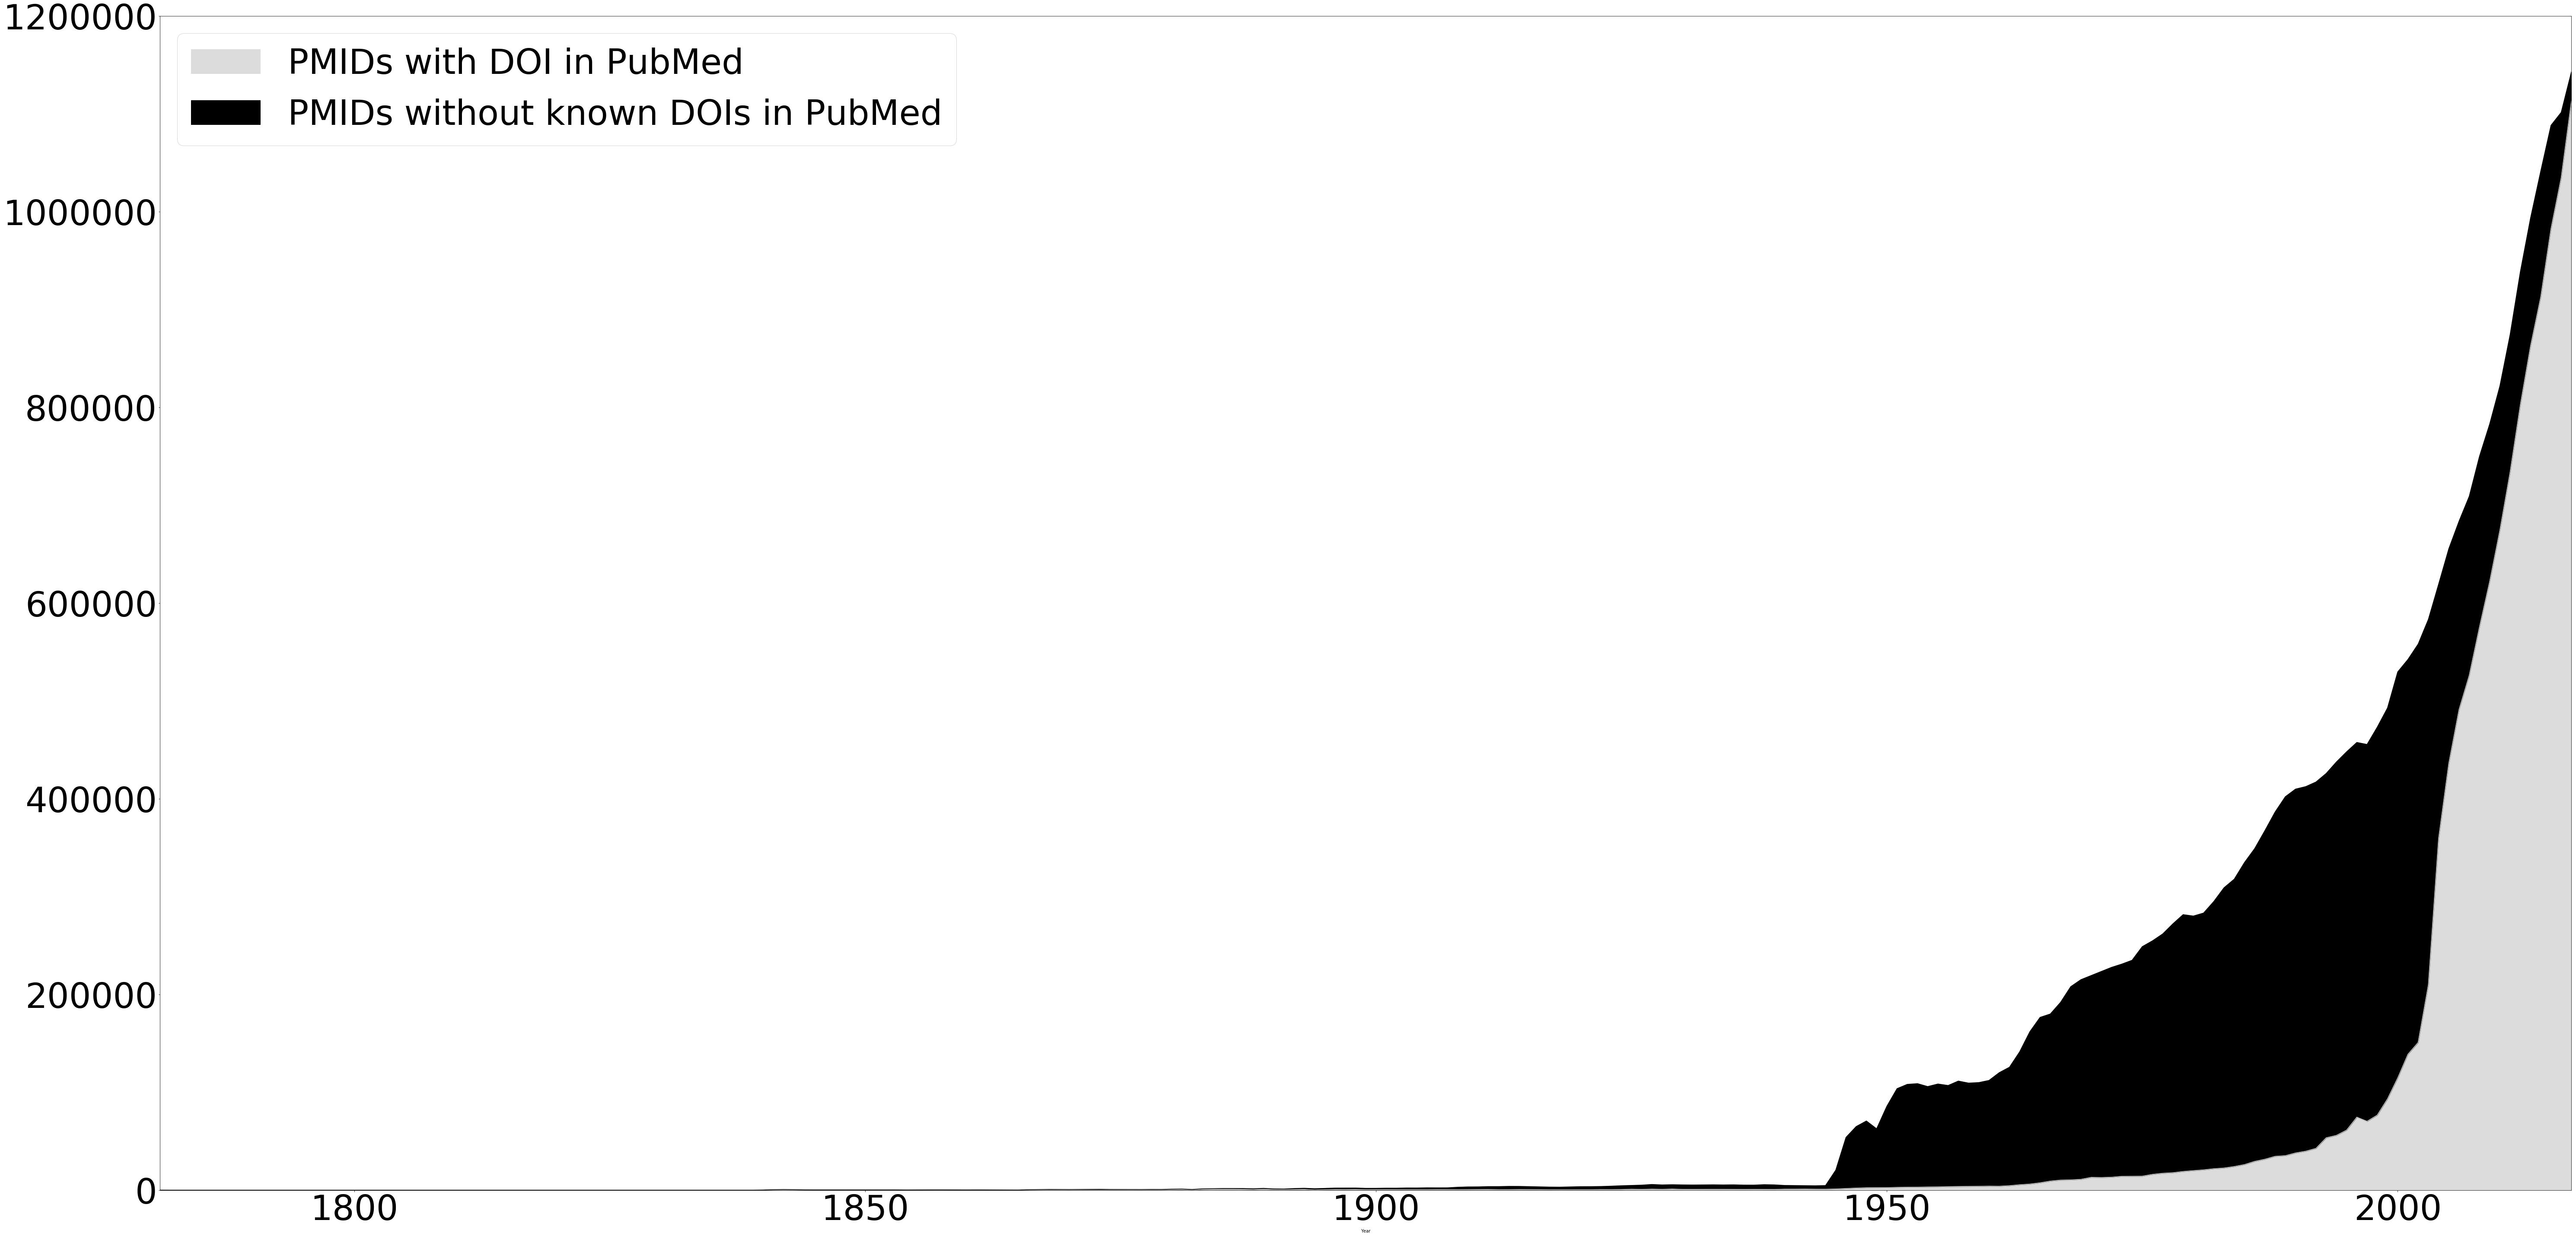

In [21]:
# plot year counts all
import matplotlib.pyplot as plt  
%matplotlib inline
myfileoutfig = 'data/results/dois_compare_pubmed_and_all.png'
doi_counts_plot1 = doi_counts_all[['PMIDs with DOI in PubMed', 'PMIDs without known DOIs in PubMed']]
ax = doi_counts_plot1.plot.area(fontsize=80, figsize=(100,50), legend=True, color=['gainsboro', 'black'])
ax = ax.legend(loc=2, prop={'size': 80})
fig = ax.get_figure()
fig.set_size_inches(100, 50)
fig.savefig(myfileoutfig, dpi=50)

In [22]:
# limit to 1945 >
doi_counts_1945_1 = doi_counts_plot1.iloc[143:]
doi_counts_1945_1

PMIDs with DOI in PubMed  PMIDs without known DOIs in PubMed
Year                                                              
1944                     952.0                              3794.0
1945                    1188.0                             19265.0
1946                    1658.0                             52254.0
1947                    2125.0                             62904.0
1948                    2428.0                             68297.0
1949                    2483.0                             60290.0
1950                    2562.0                             83181.0
1951                    2833.0                            100952.0
1952                    2996.0                            105151.0
1953                    3050.0                            105847.0
1954                    3239.0                            102671.0
1955                    3311.0                            105221.0
1956                    3597.0                            103417.0
1957                    3714.0                            107814.0
1958                    3814.0                            105653.0
1959                    3919.0                            106063.0
1960                    4111.0                            108059.0
1961                    4004.0                            116098.0
1962                    4556.0                            121114.0
1963                    5516.0                            135897.0
1964                    6218.0                            155789.0
1965                    7507.0                            169126.0
1966                    9239.0                            170831.0
1967                   10269.0                            181675.0
1968                   10488.0                            197528.0
1969                   11058.0                            204118.0
1970                   13055.0                            206302.0
1971                   12893.0                            210654.0
1972                   13214.0                            214536.0
1973                   14129.0                            216945.0
...                        ...                                 ...
1988                   34561.0                            351951.0
1989                   35222.0                            366906.0
1990                   37987.0                            371924.0
1991                   39789.0                            372667.0
1992                   42662.0                            374499.0
1993                   53514.0                            372379.0
1994                   55948.0                            381683.0
1995                   61338.0                            386690.0
1996                   74579.0                            383022.0
1997                   70320.0                            385228.0
1998                   76671.0                            396579.0
1999                   93232.0                            399588.0
2000                  114627.0                            415060.0
2001                  138827.0                            403569.0
2002                  150921.0                            407197.0
2003                  209818.0                            373553.0
2004                  359280.0                            259963.0
2005                  436225.0                            219347.0
2006                  491057.0                            192624.0
2007                  526142.0                            183002.0
2008                  575444.0                            174477.0
2009                  622026.0                            161007.0
2010                  674473.0                            147433.0
2011                  733828.0                            140541.0
2012                  802426.0                            136069.0
2013                  862675.0                            130872.0
2014                  912865.0                       

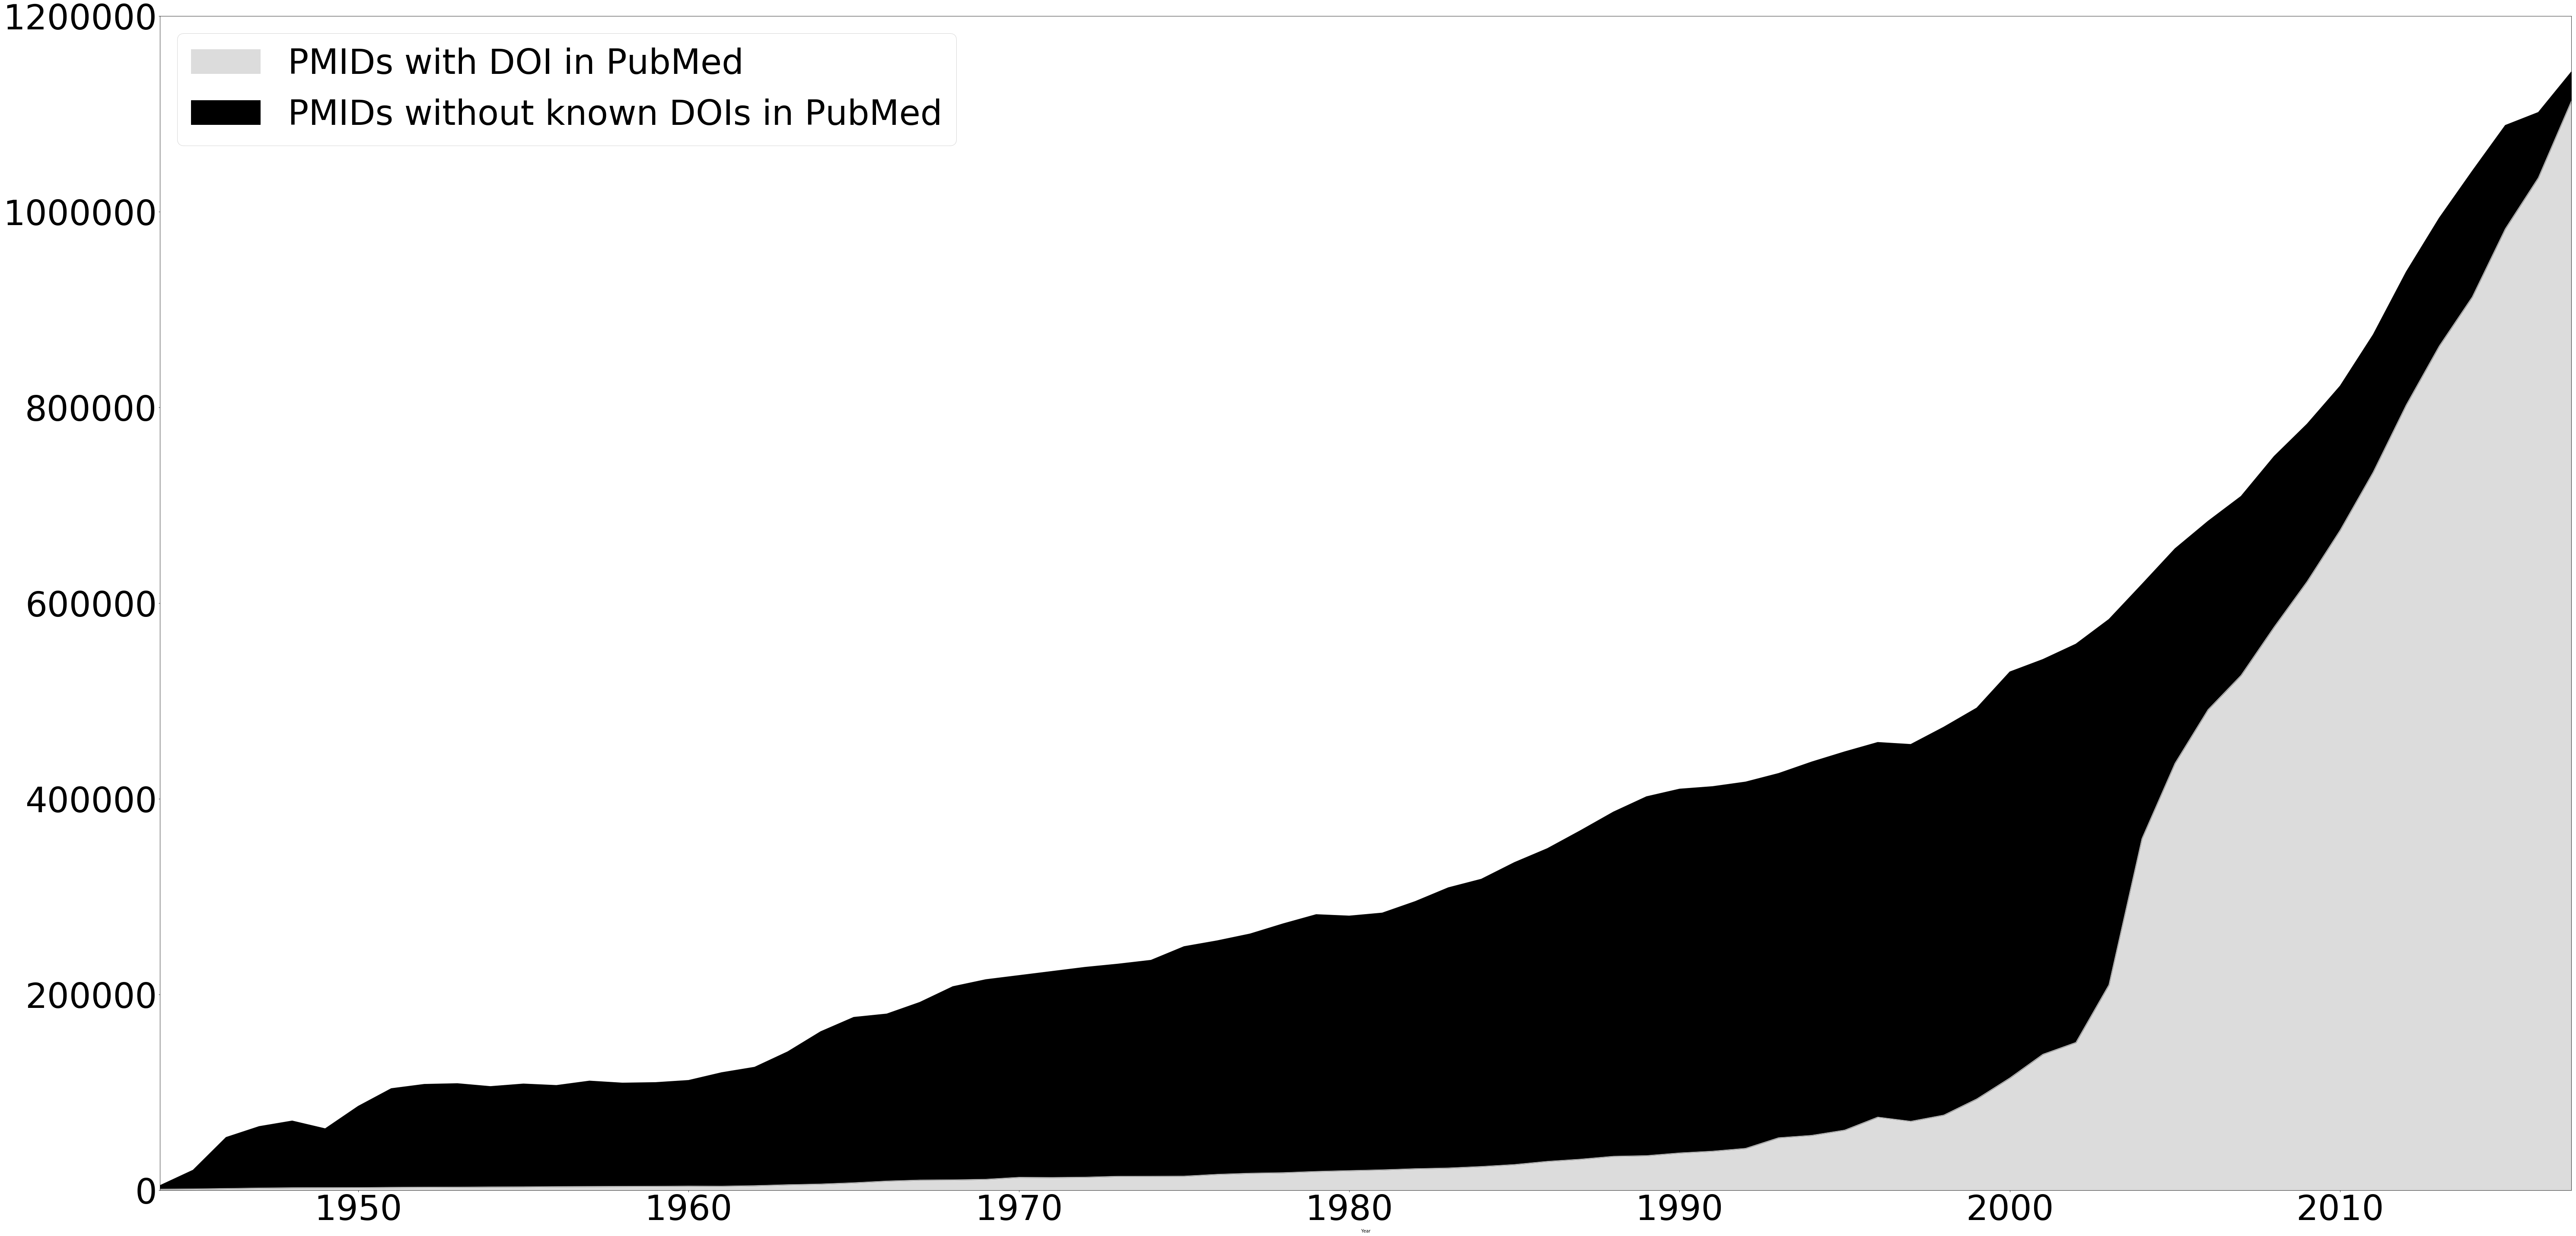

In [23]:
# plot year counts for 1945 ->
myfileoutfig = 'data/results/dois_compare_pubmed_and_all_after_1950.png'
ax = doi_counts_1945_1.plot.area(fontsize=80, figsize=(100,50), legend=True, color=['gainsboro', 'black'])
ax = ax.legend(loc=2, prop={'size': 80})
fig = ax.get_figure()
fig.set_size_inches(100, 50)
fig.savefig(myfileoutfig, dpi=50)

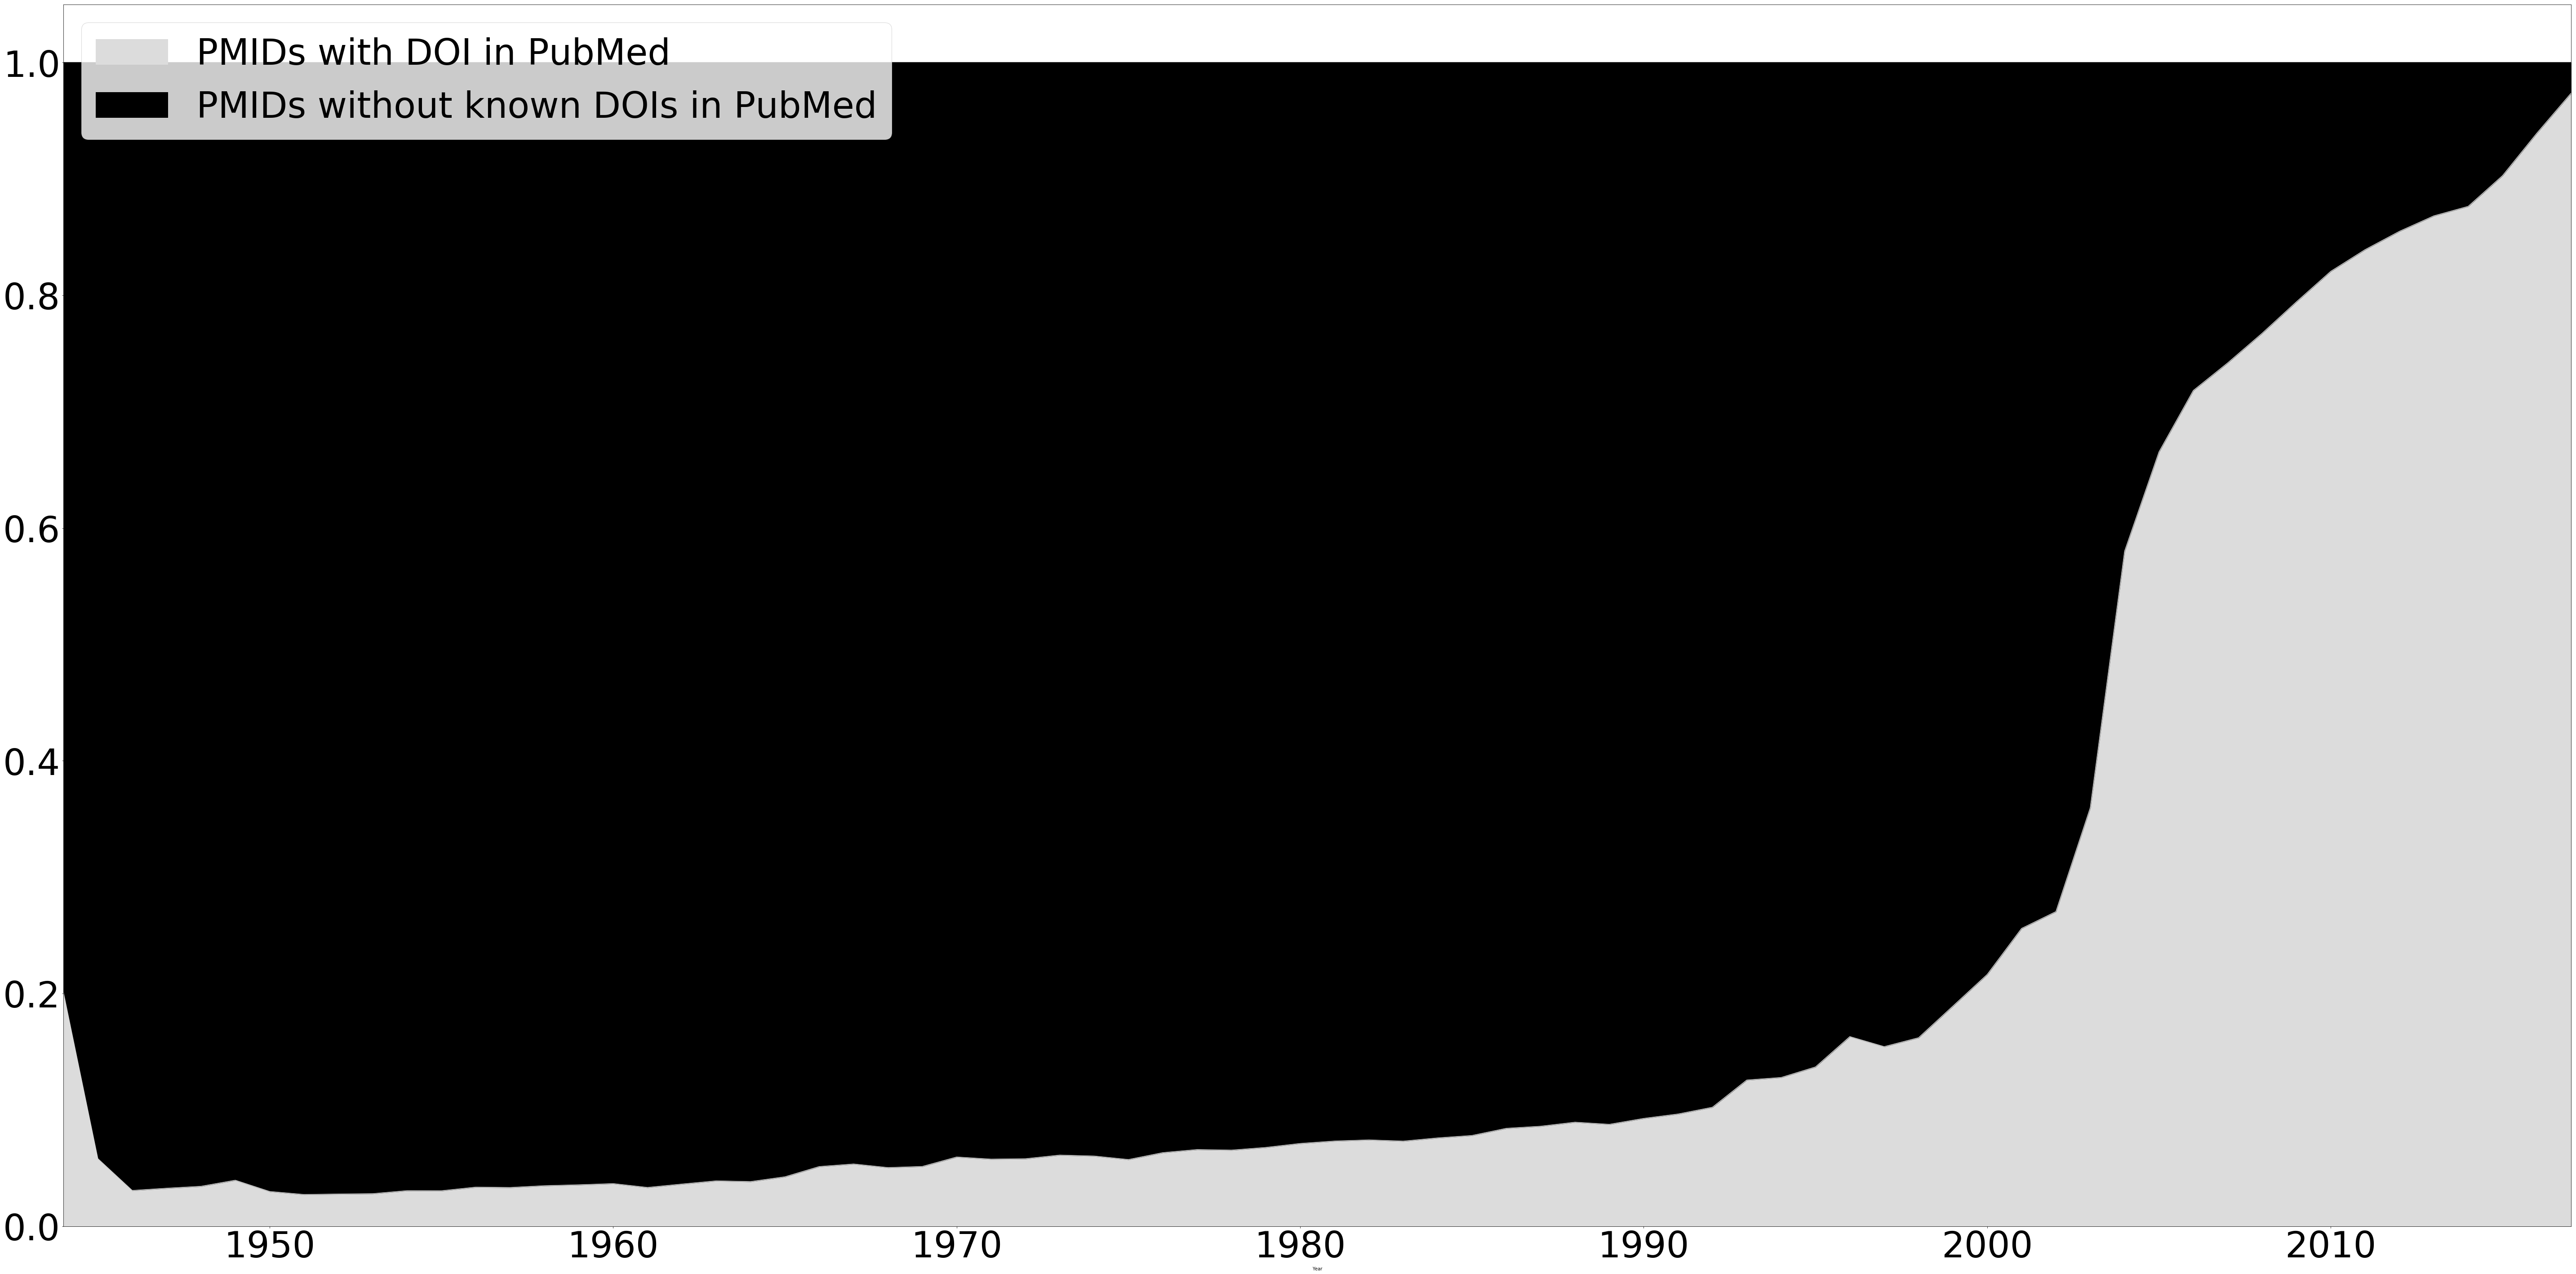

In [24]:
# plot year counts for 1945 ->
# We need to transform the data from raw data to percentage (fraction)
doi_counts_1945_1_perc = doi_counts_1945_1.divide(doi_counts_1945_1.sum(axis=1), axis=0)

myfileoutfig = 'data/results/dois_compare_pubmed_and_all_after_1950_percent.png'
ax = doi_counts_1945_1_perc.plot.area(fontsize=80, figsize=(100,50), legend=True, color=['gainsboro', 'black'])
ax = ax.legend(loc=2, prop={'size': 80})
fig = ax.get_figure()
fig.set_size_inches(100, 50)
fig.savefig(myfileoutfig, dpi=50)

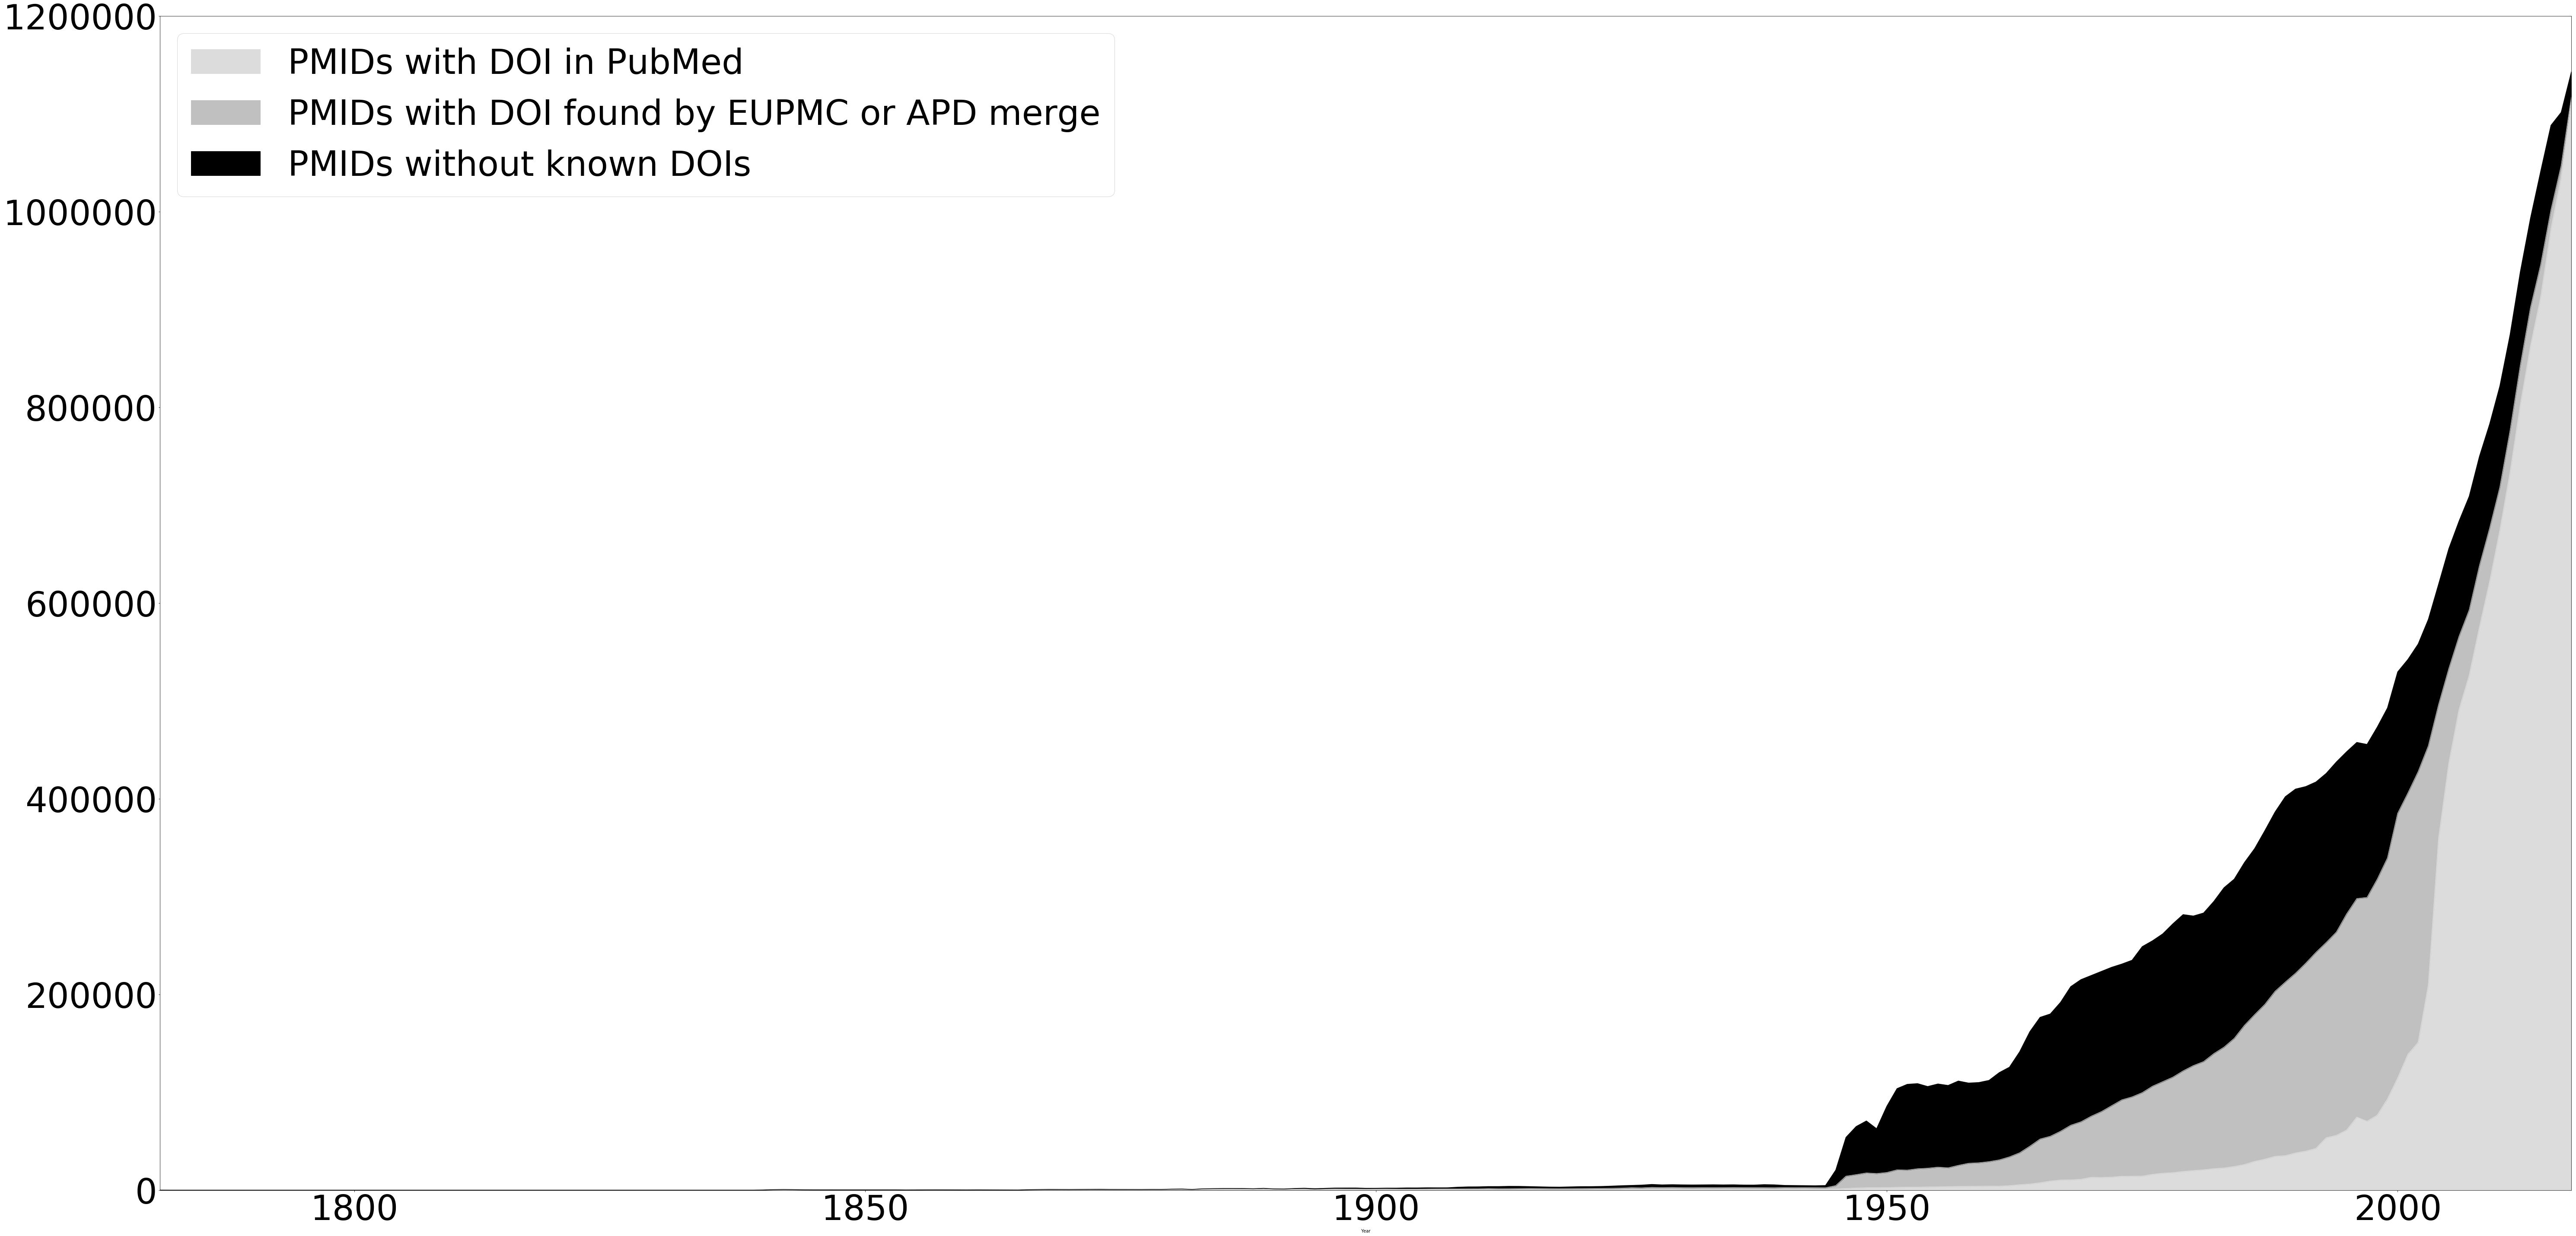

In [25]:
# plot year counts with EUPMC or APD
import matplotlib.pyplot as plt  
%matplotlib inline
myfileoutfig = 'data/results/dois_compare_pubmed_and_eupmc_or_apd.png'
doi_counts_plot2 = doi_counts_all[['PMIDs with DOI in PubMed', 'PMIDs with DOI found by EUPMC or APD merge', 'PMIDs without known DOIs']]
ax = doi_counts_plot2.plot.area(fontsize=80, figsize=(100,50), legend=True, color=['gainsboro', 'silver', 'black'])
ax = ax.legend(loc=2, prop={'size': 80})
fig = ax.get_figure()
fig.set_size_inches(100, 50)
fig.savefig(myfileoutfig, dpi=50)

In [26]:
# limit to 1945 >
doi_counts_1945_2 = doi_counts_plot2.iloc[143:]
doi_counts_1945_2

PMIDs with DOI in PubMed  PMIDs with DOI found by EUPMC or APD merge  \
Year                                                                         
1944                     952.0                                      1421.0   
1945                    1188.0                                      3400.0   
1946                    1658.0                                     12560.0   
1947                    2125.0                                     13671.0   
1948                    2428.0                                     15103.0   
1949                    2483.0                                     14429.0   
1950                    2562.0                                     15412.0   
1951                    2833.0                                     17878.0   
1952                    2996.0                                     17434.0   
1953                    3050.0                                     18774.0   
1954                    3239.0                                     19127.0   
1955                    3311.0                                     20137.0   
1956                    3597.0                                     19155.0   
1957                    3714.0                                     21568.0   
1958                    3814.0                                     23601.0   
1959                    3919.0                                     23988.0   
1960                    4111.0                                     24963.0   
1961                    4004.0                                     26864.0   
1962                    4556.0                                     29393.0   
1963                    5516.0                                     32618.0   
1964                    6218.0                                     38686.0   
1965                    7507.0                                     44683.0   
1966                    9239.0                                     45775.0   
1967                   10269.0                                     49858.0   
1968                   10488.0                                     55807.0   
1969                   11058.0                                     58725.0   
1970                   13055.0                                     62447.0   
1971                   12893.0                                     67316.0   
1972                   13214.0                                     73038.0   
1973                   14129.0                                     78107.0   
...                        ...                                         ...   
1988                   34561.0                                    168672.0   
1989                   35222.0                                    177388.0   
1990                   37987.0                                    183651.0   
1991                   39789.0                                    192106.0   
1992                   42662.0                                    200337.0   
1993                   53514.0                                    199530.0   
1994                   55948.0                                    207756.0   
1995                   61338.0                                    220866.0   
1996                   74579.0                                    223376.0   
1997                   70320.0                                    228774.0   
1998                   76671.0                                    241117.0   
1999                   93232.0                                    246280.0   
2000                  114627.0                                    270475.0   
2001                  138827.0                                    267013.0   
2002                  150921.0                                    276723.0   
2003                  209818.0                                    244252.0   
2004                  359280.0                                    136788.0   
2005                  436225.0                                     96644.0   
2006                  491057

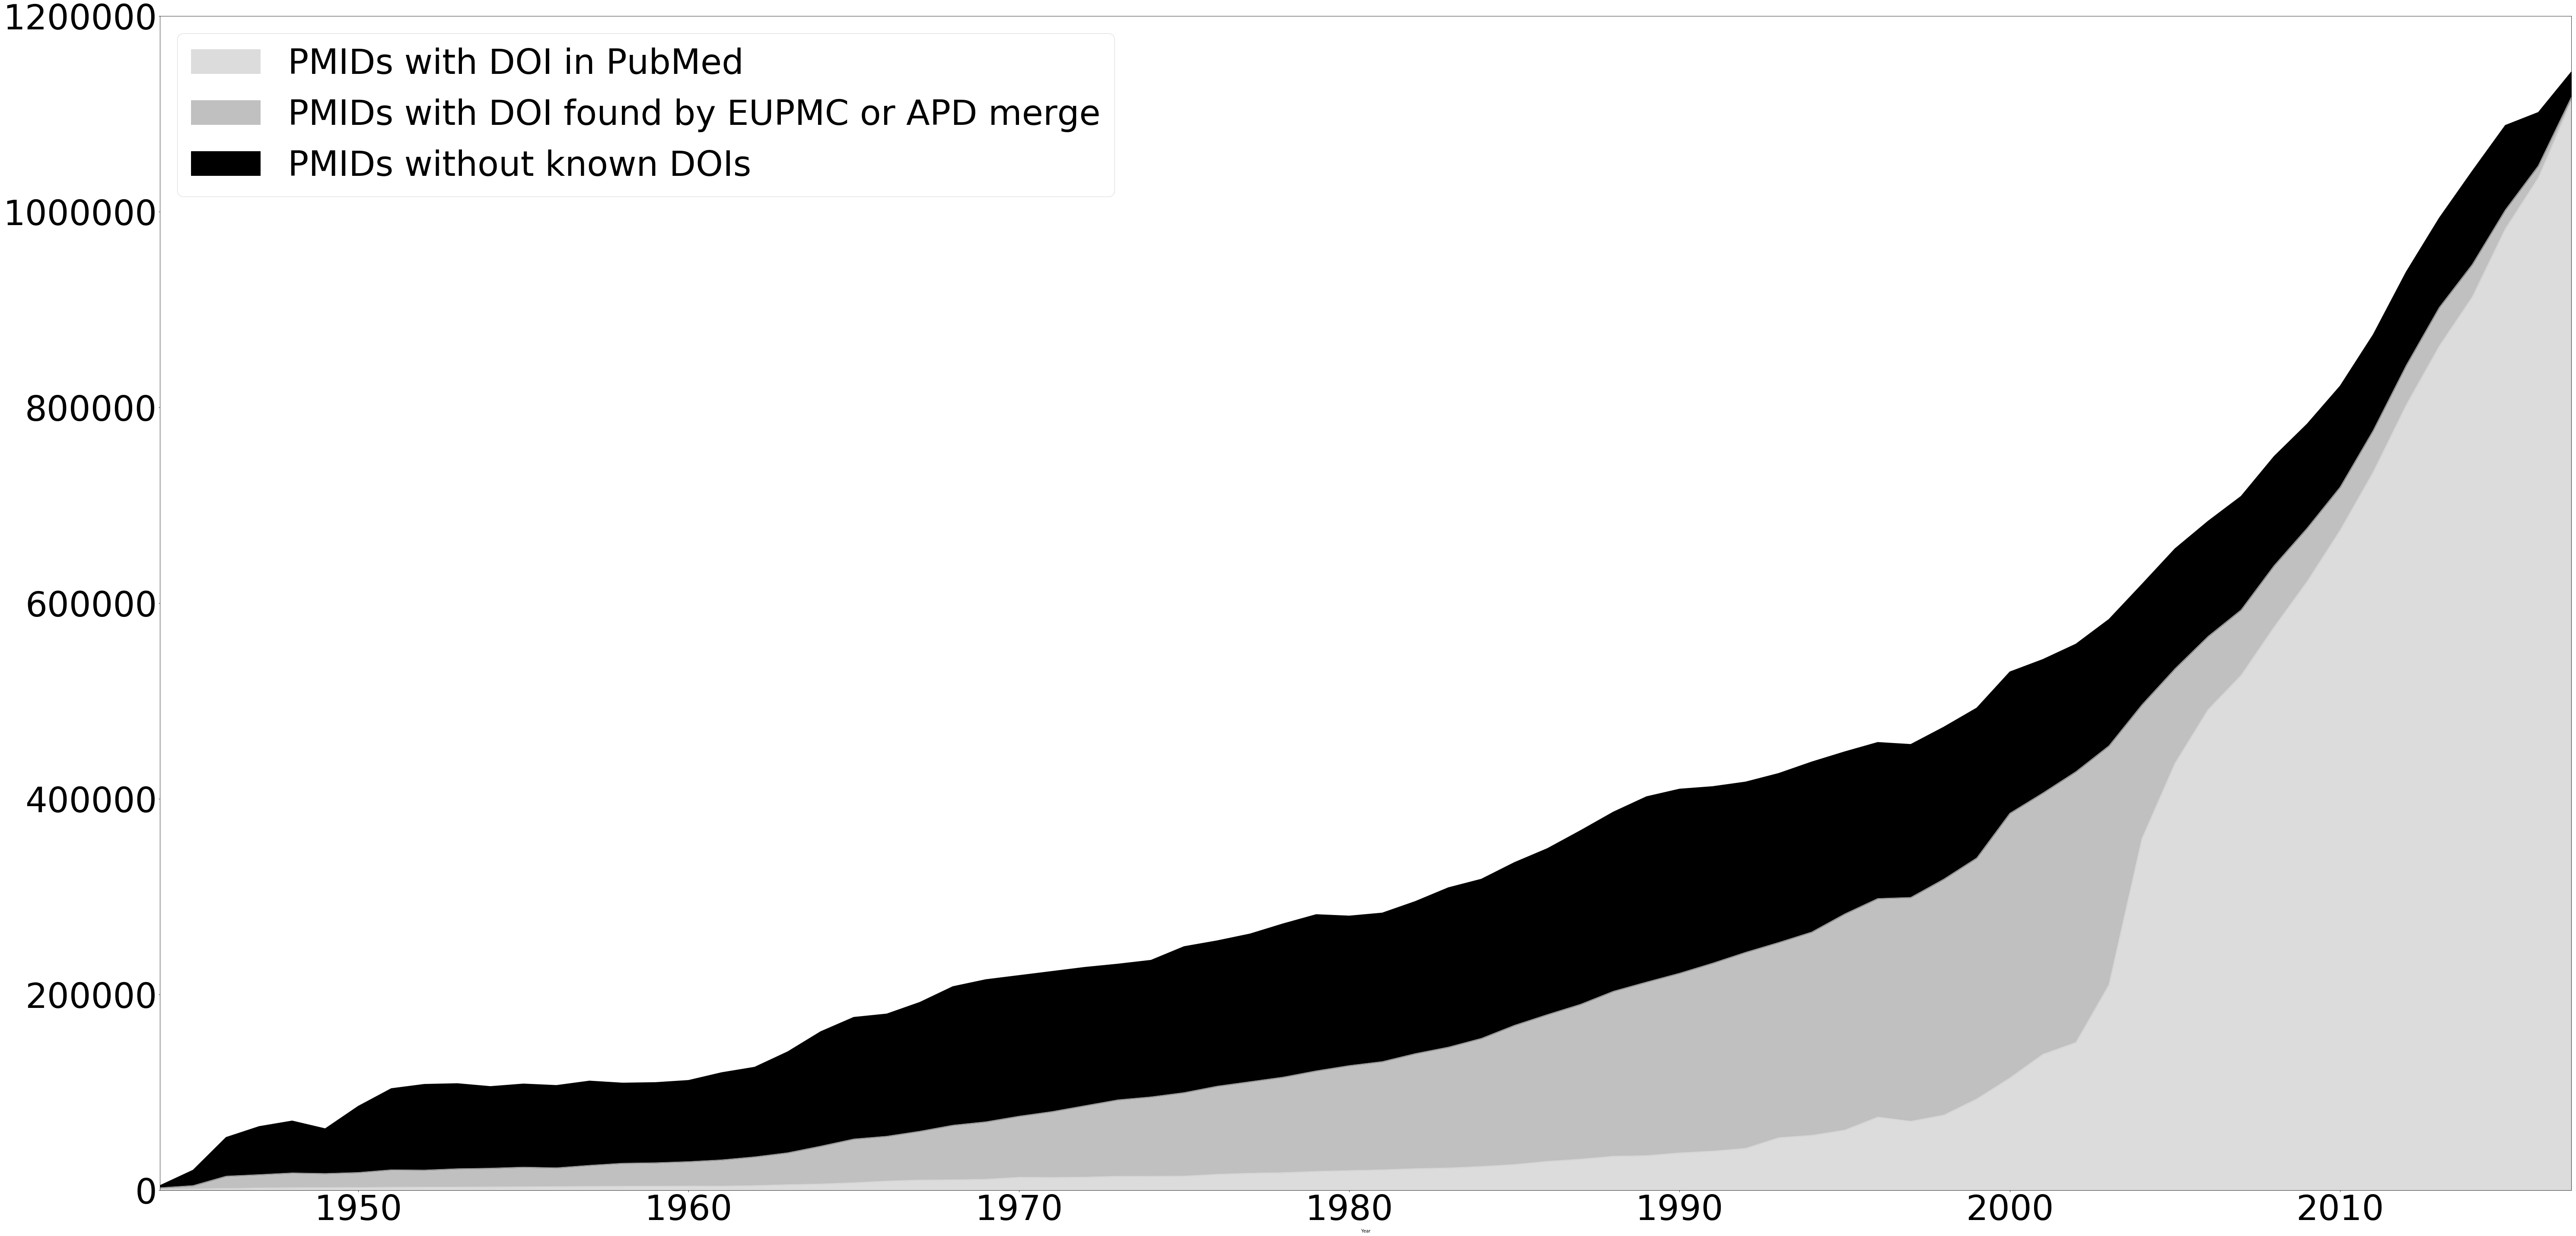

In [27]:
# plot year counts for 1945 ->
myfileoutfig = 'data/results/dois_compare_pubmed_and_eupmc_or_apd_after_1950.png'
ax = doi_counts_1945_2.plot.area(fontsize=80, figsize=(100,50), legend=True, color=['gainsboro', 'silver', 'black'])
ax = ax.legend(loc=2, prop={'size': 80})
fig = ax.get_figure()
fig.set_size_inches(100, 50)
fig.savefig(myfileoutfig, dpi=50)

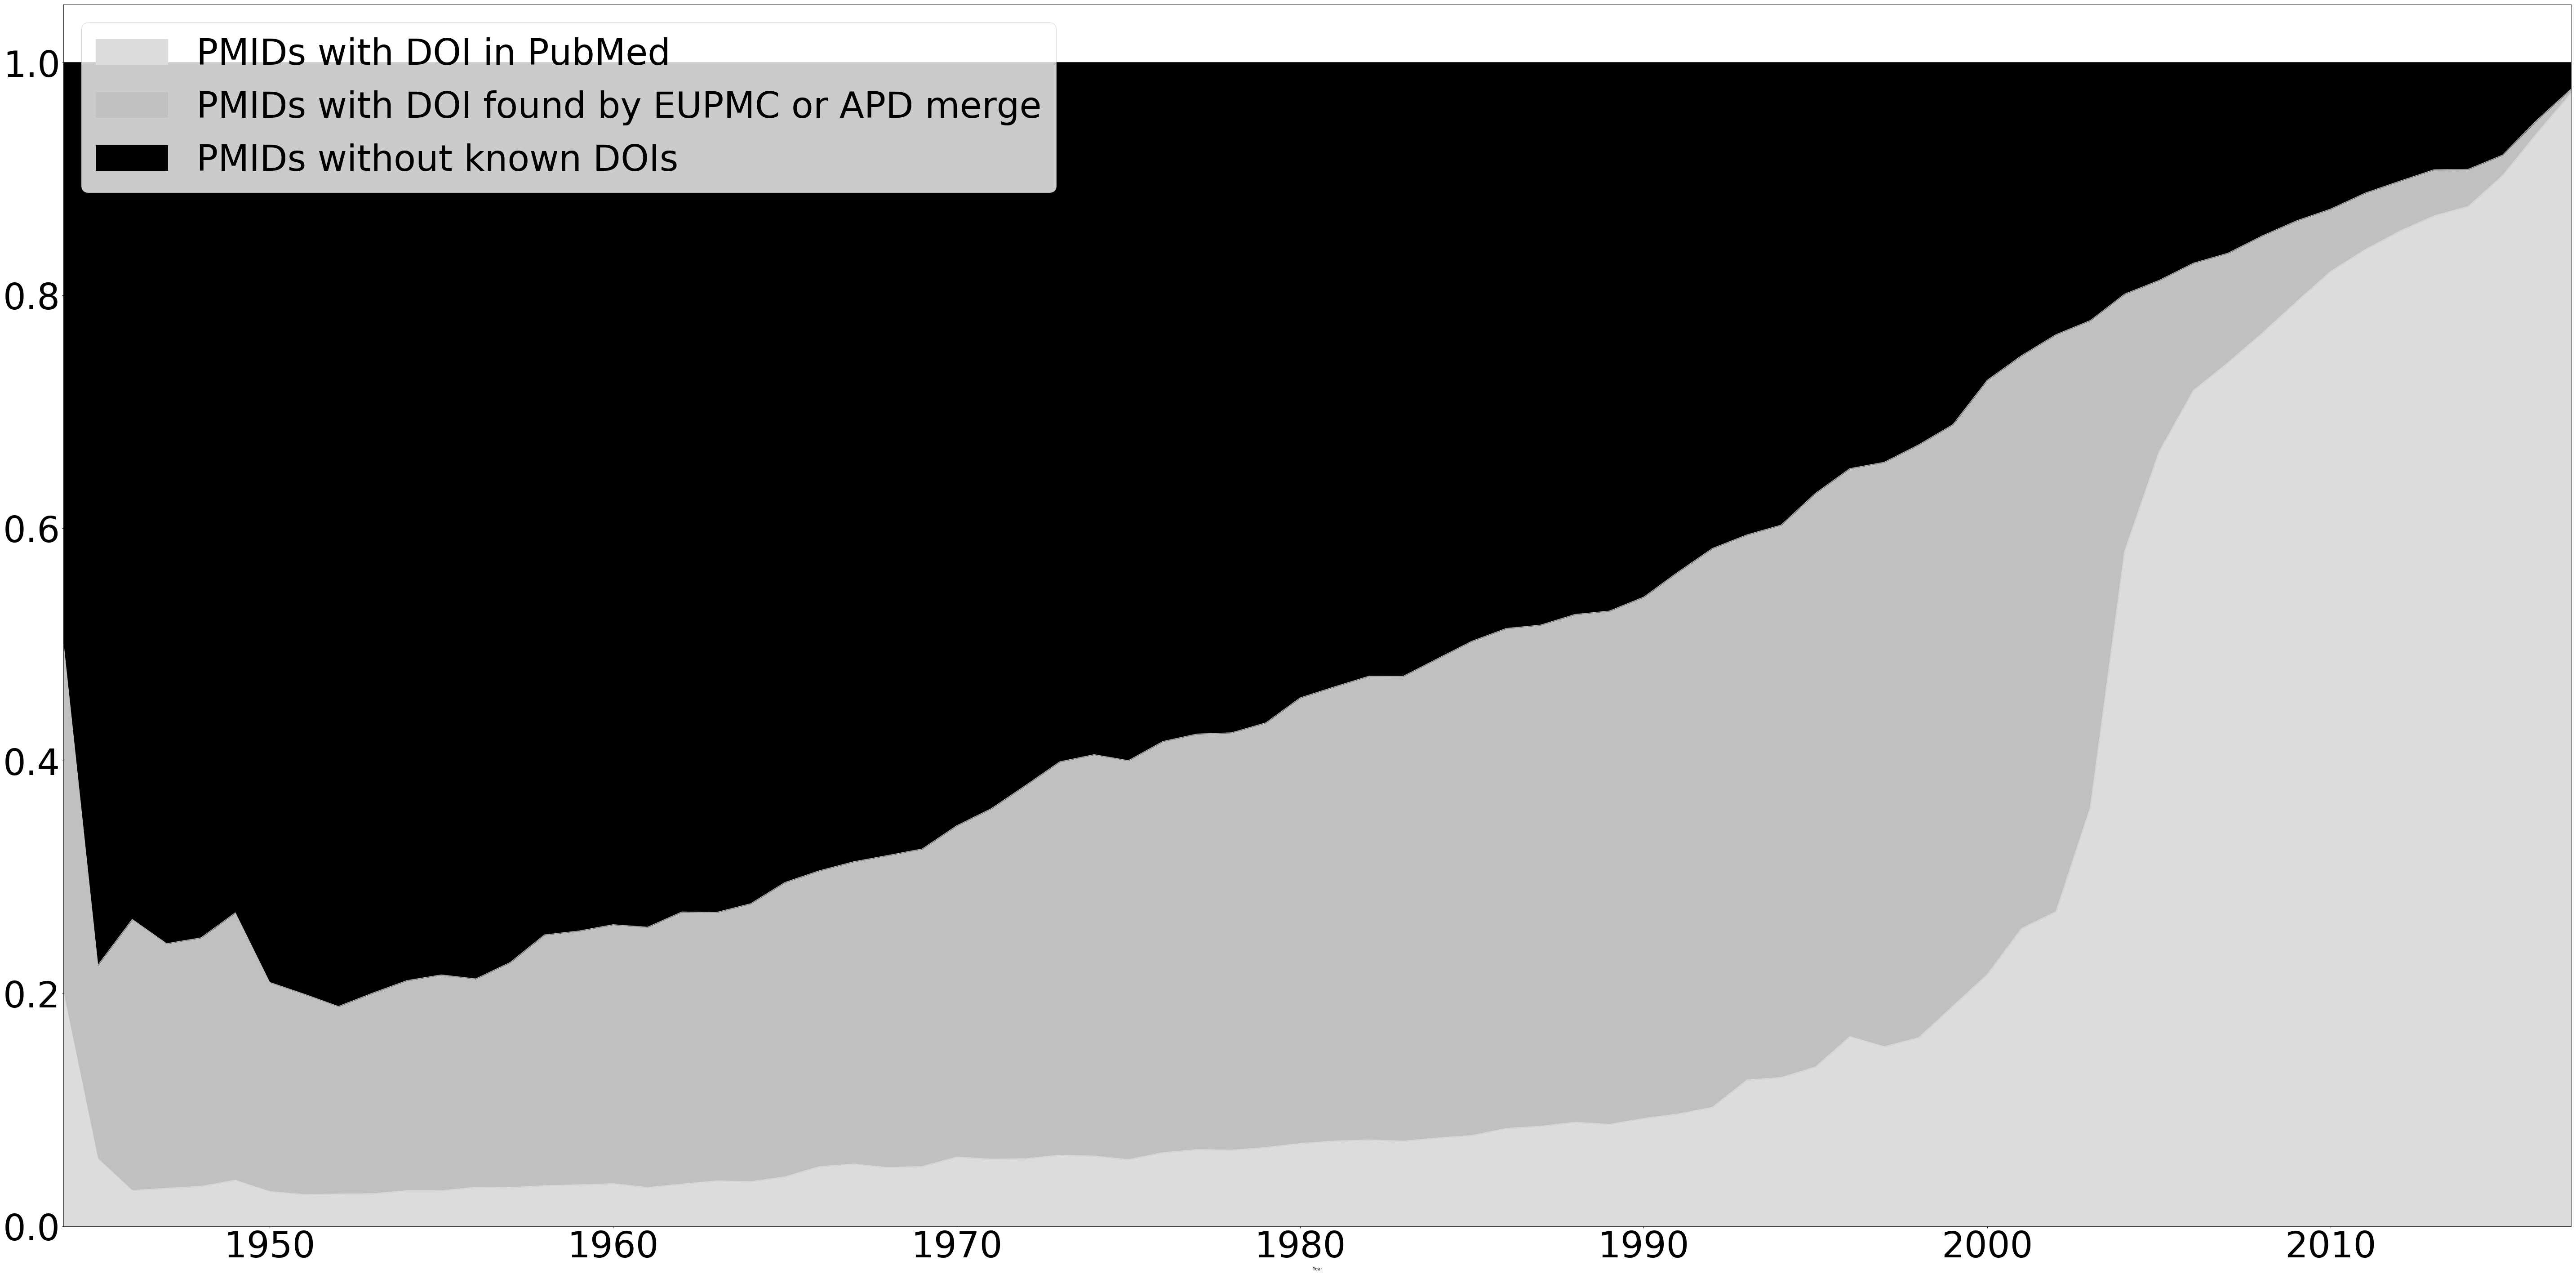

In [28]:
# plot year counts for 1945 ->
# We need to transform the data from raw data to percentage (fraction)
doi_counts_1945_2_perc = doi_counts_1945_2.divide(doi_counts_1945_2.sum(axis=1), axis=0)

myfileoutfig = 'data/results/dois_compare_pubmed_and_eupmc_or_apd_after_1950_percent.png'
ax = doi_counts_1945_2_perc.plot.area(fontsize=80, figsize=(100,50), legend=True, color=['gainsboro', 'silver', 'black'])
ax = ax.legend(loc=2, prop={'size': 80})
fig = ax.get_figure()
fig.set_size_inches(100, 50)
fig.savefig(myfileoutfig, dpi=50)

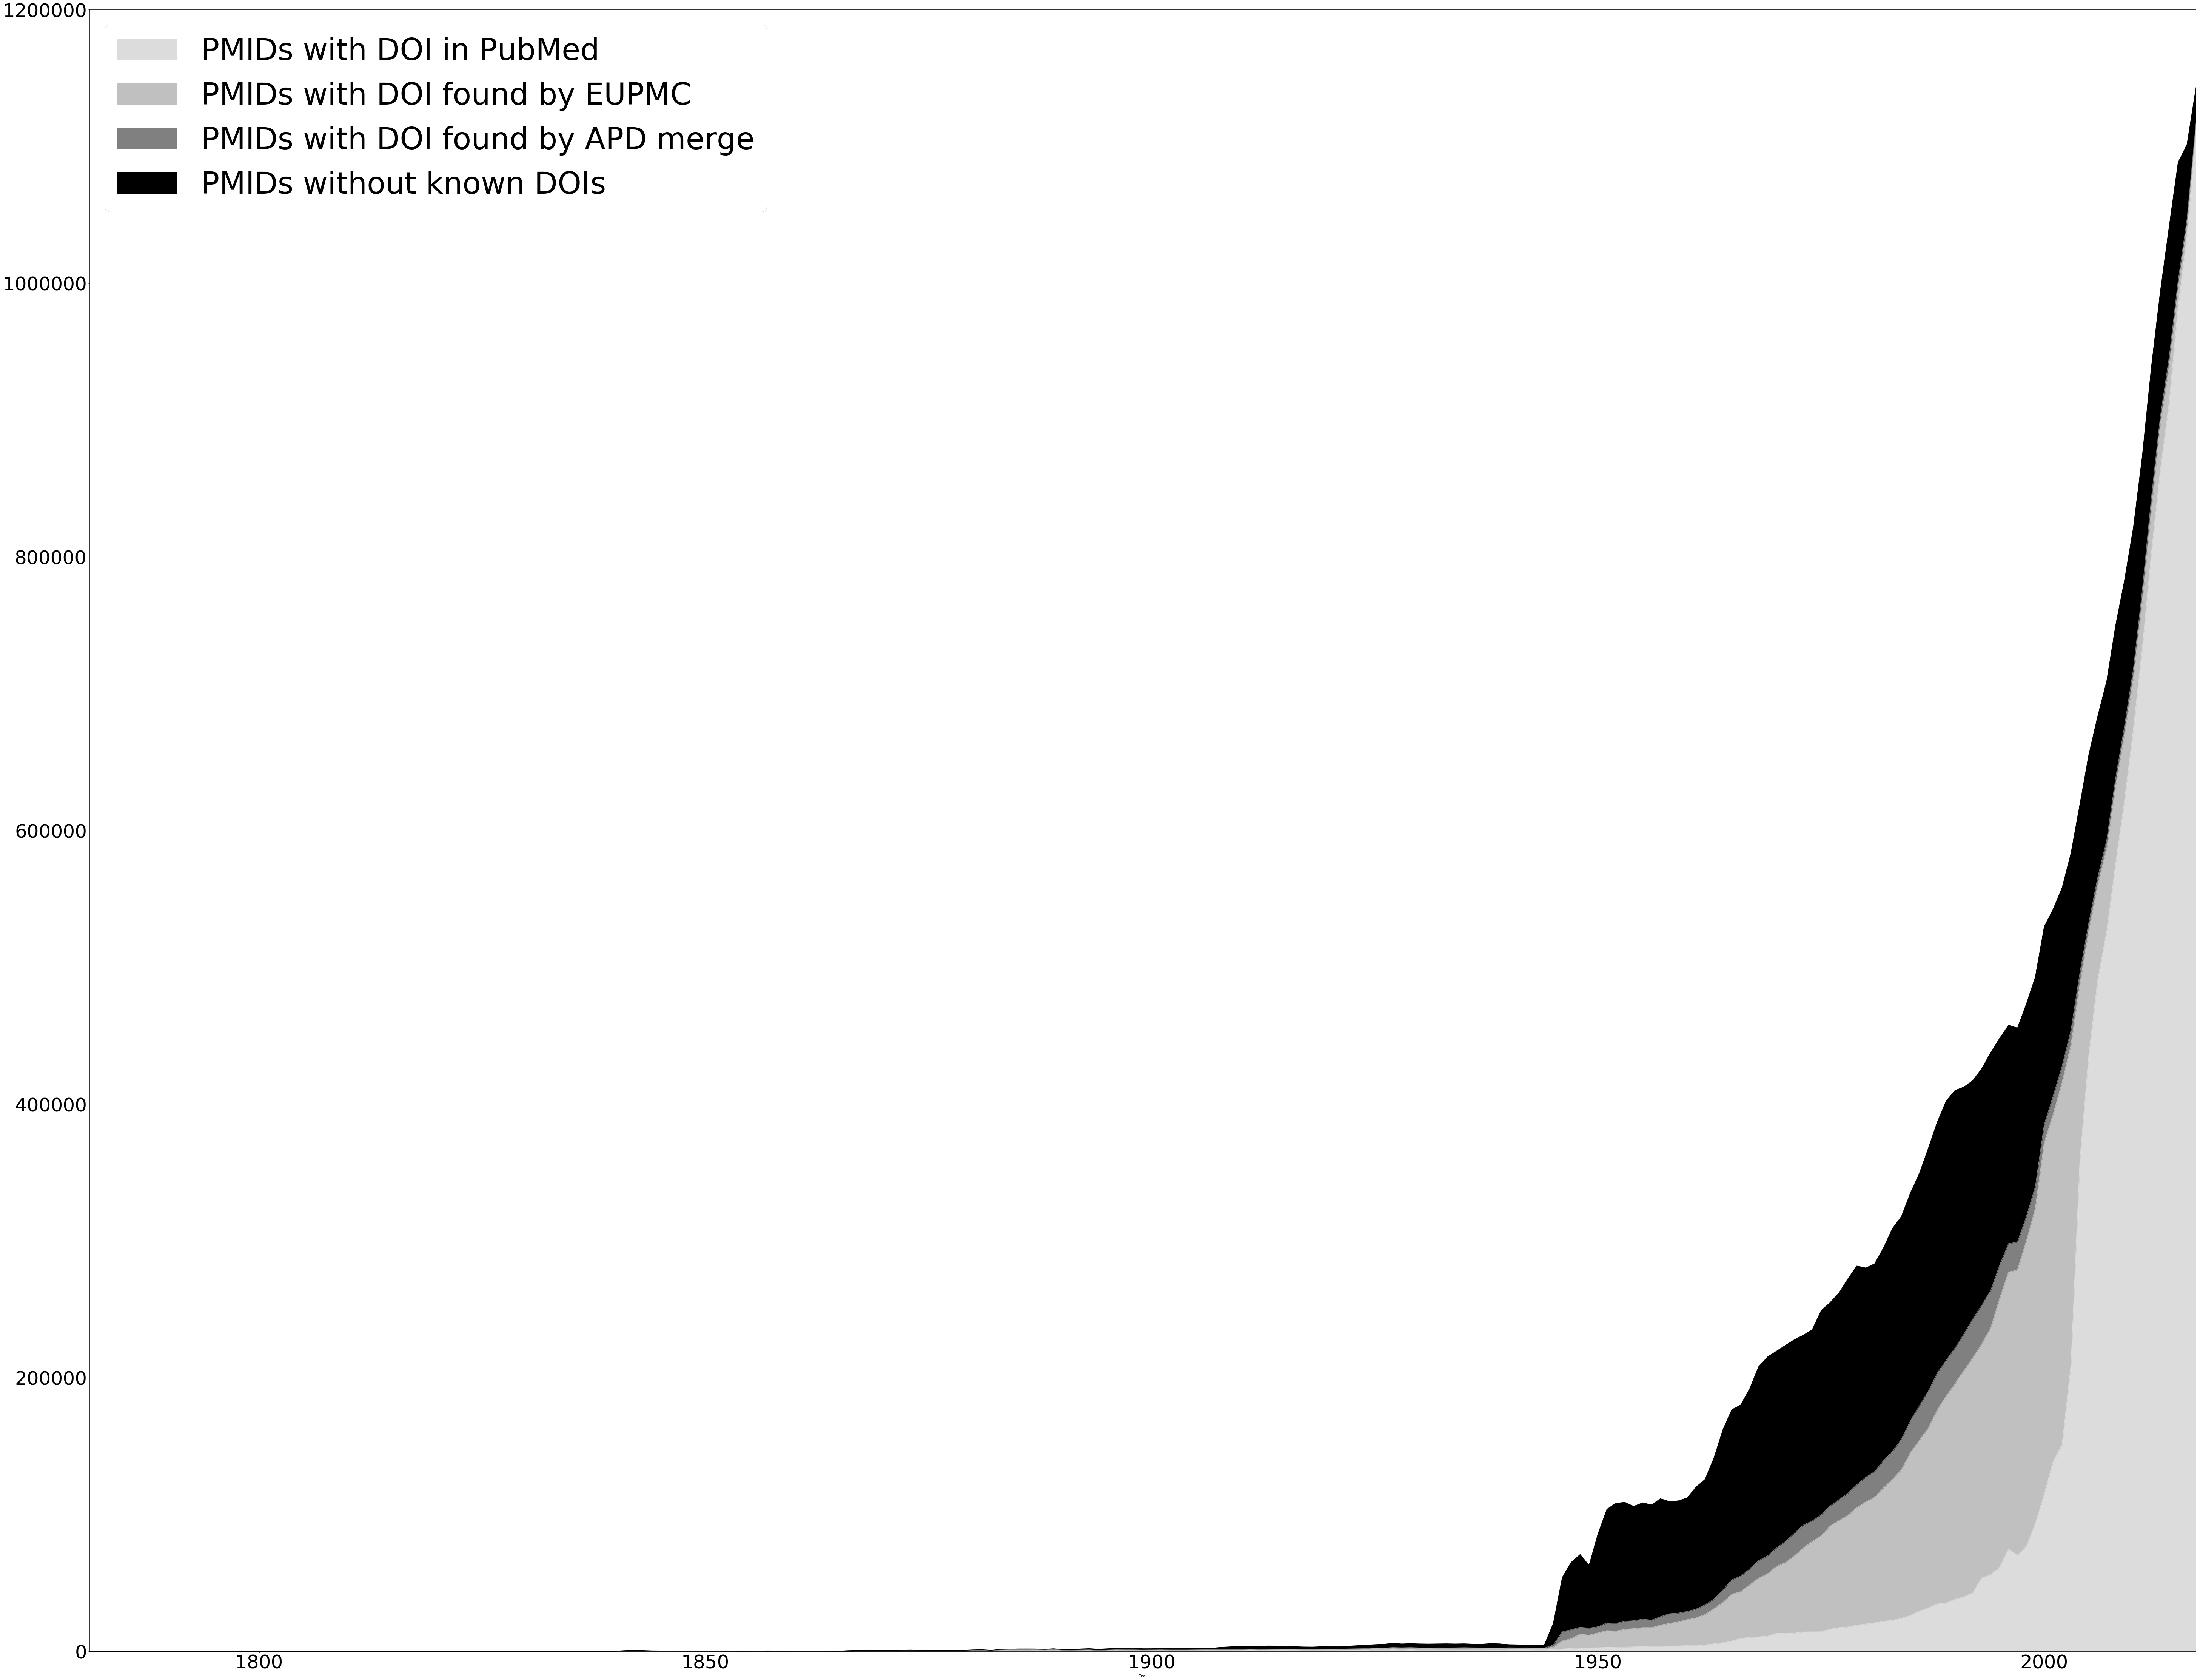

In [29]:
# plot year counts with 3 data sources ditinction
myfileoutfig = 'data/results/dois_compare_pubmed_and_eupmc_and_apd.png'
doi_counts_plot3 = doi_counts_all2[['PMIDs with DOI in PubMed', 'PMIDs with DOI found by EUPMC', 'PMIDs with DOI found by APD merge', 'PMIDs without known DOIs']]
ax = doi_counts_plot3.plot.area(fontsize=50, figsize=(100,50), legend=True, color=['gainsboro', 'silver', 'grey', 'black'])
ax = ax.legend(loc=2, prop={'size': 80})
fig = ax.get_figure()
fig.set_size_inches(100, 80)
fig.savefig(myfileoutfig, dpi=50)

In [30]:
# limit to 1945 >
doi_counts_1945_3 = doi_counts_plot3.iloc[143:]
doi_counts_1945_3

PMIDs with DOI in PubMed  PMIDs with DOI found by EUPMC  \
Year                                                            
1944                     952.0                          972.0   
1945                    1188.0                         1892.0   
1946                    1658.0                         5806.0   
1947                    2125.0                         7121.0   
1948                    2428.0                         9994.0   
1949                    2483.0                         9275.0   
1950                    2562.0                        10854.0   
1951                    2833.0                        12261.0   
1952                    2996.0                        11717.0   
1953                    3050.0                        13000.0   
1954                    3239.0                        13320.0   
1955                    3311.0                        13994.0   
1956                    3597.0                        13688.0   
1957                    3714.0                        15439.0   
1958                    3814.0                        16545.0   
1959                    3919.0                        17516.0   
1960                    4111.0                        19016.0   
1961                    4004.0                        20396.0   
1962                    4556.0                        22329.0   
1963                    5516.0                        25560.0   
1964                    6218.0                        29468.0   
1965                    7507.0                        34181.0   
1966                    9239.0                        34369.0   
1967                   10269.0                        38264.0   
1968                   10488.0                        42894.0   
1969                   11058.0                        45578.0   
1970                   13055.0                        49003.0   
1971                   12893.0                        51852.0   
1972                   13214.0                        56505.0   
1973                   14129.0                        61327.0   
...                        ...                            ...   
1988                   34561.0                       141571.0   
1989                   35222.0                       151029.0   
1990                   37987.0                       157619.0   
1991                   39789.0                       165255.0   
1992                   42662.0                       171900.0   
1993                   53514.0                       171181.0   
1994                   55948.0                       180296.0   
1995                   61338.0                       196502.0   
1996                   74579.0                       202620.0   
1997                   70320.0                       208413.0   
1998                   76671.0                       223214.0   
1999                   93232.0                       230556.0   
2000                  114627.0                       257037.0   
2001                  138827.0                       253694.0   
2002                  150921.0                       264863.0   
2003                  209818.0                       233527.0   
2004                  359280.0                       128384.0   
2005                  436225.0                        90911.0   
2006                  491057.0                        68993.0   
2007                  526142.0                        60810.0   
2008                  575444.0                        57167.0   
2009                  622026.0                        48549.0   
2010                  674473.0                        37625.0   
2011                  733828.0                        35047.0   
2012                  802426.0                        31988.0   
2013                  862675.0                        34347.0   
2014                  912865.0                        26347.0   
2015                  982492.0                        13397.0   
2016                 1034698.0           

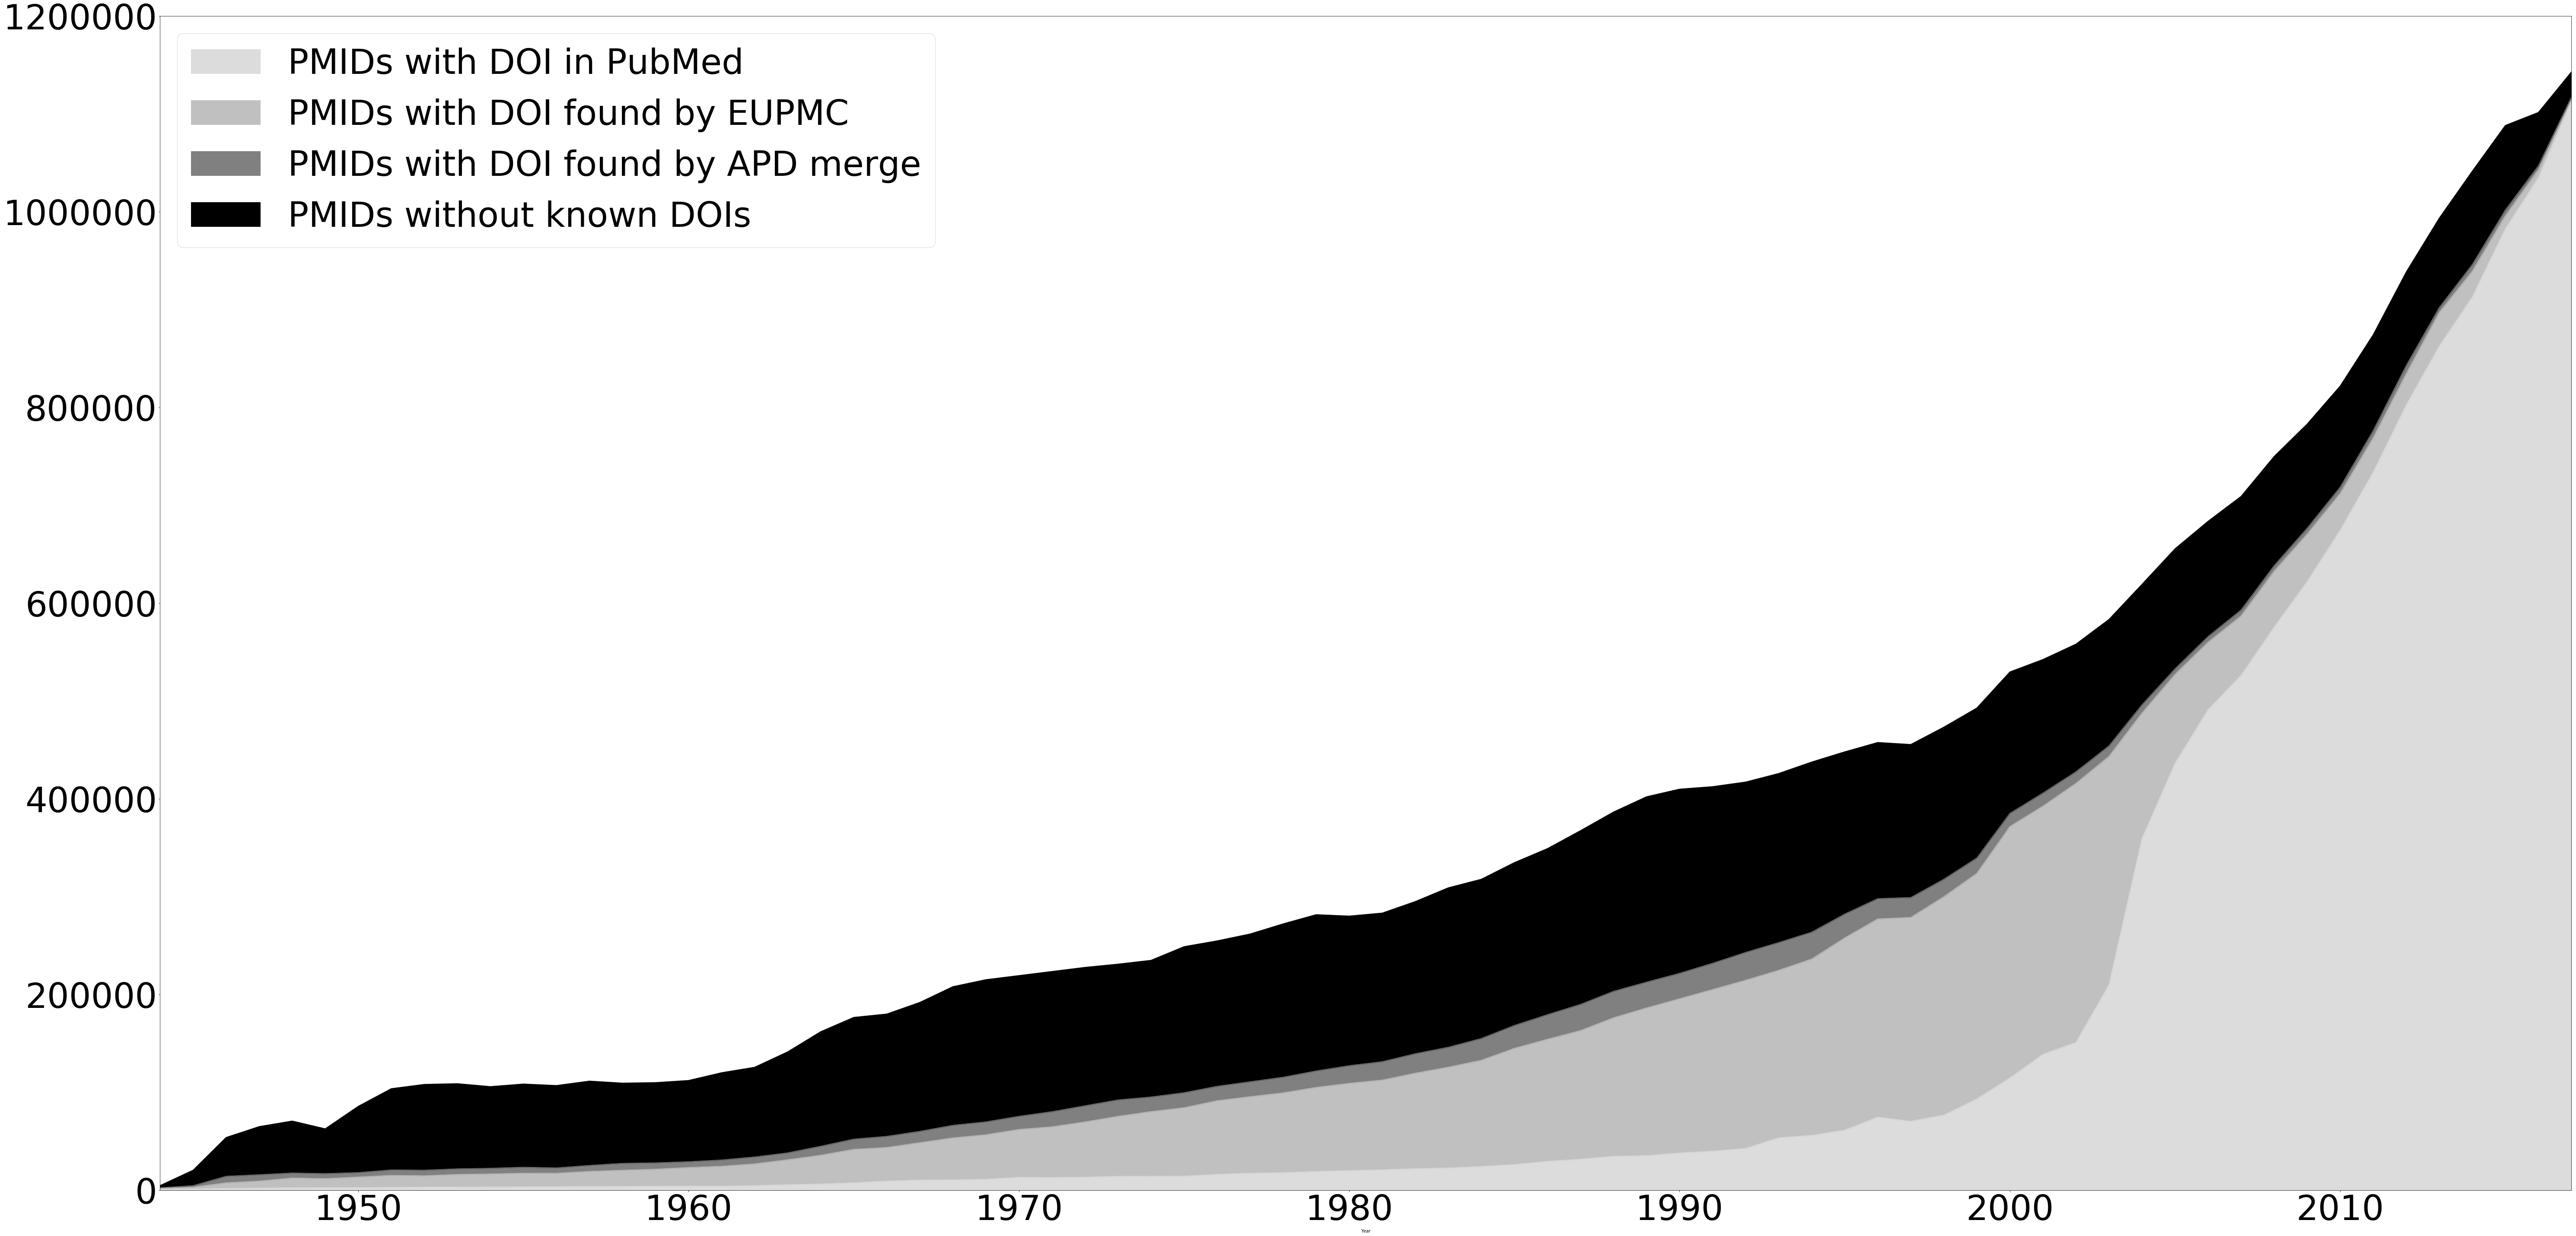

In [31]:
# plot year counts for 1950 ->
myfileoutfig = 'data/results/dois_compare_pubmed_and_eupmc_and_apd_after_1950.png'
ax = doi_counts_1945_3.plot.area(fontsize=80, figsize=(100,50), legend=True, color=['gainsboro', 'silver', 'grey', 'black'])
ax = ax.legend(loc=2, prop={'size': 80})
fig = ax.get_figure()
fig.set_size_inches(100, 50)
fig.savefig(myfileoutfig, dpi=50)

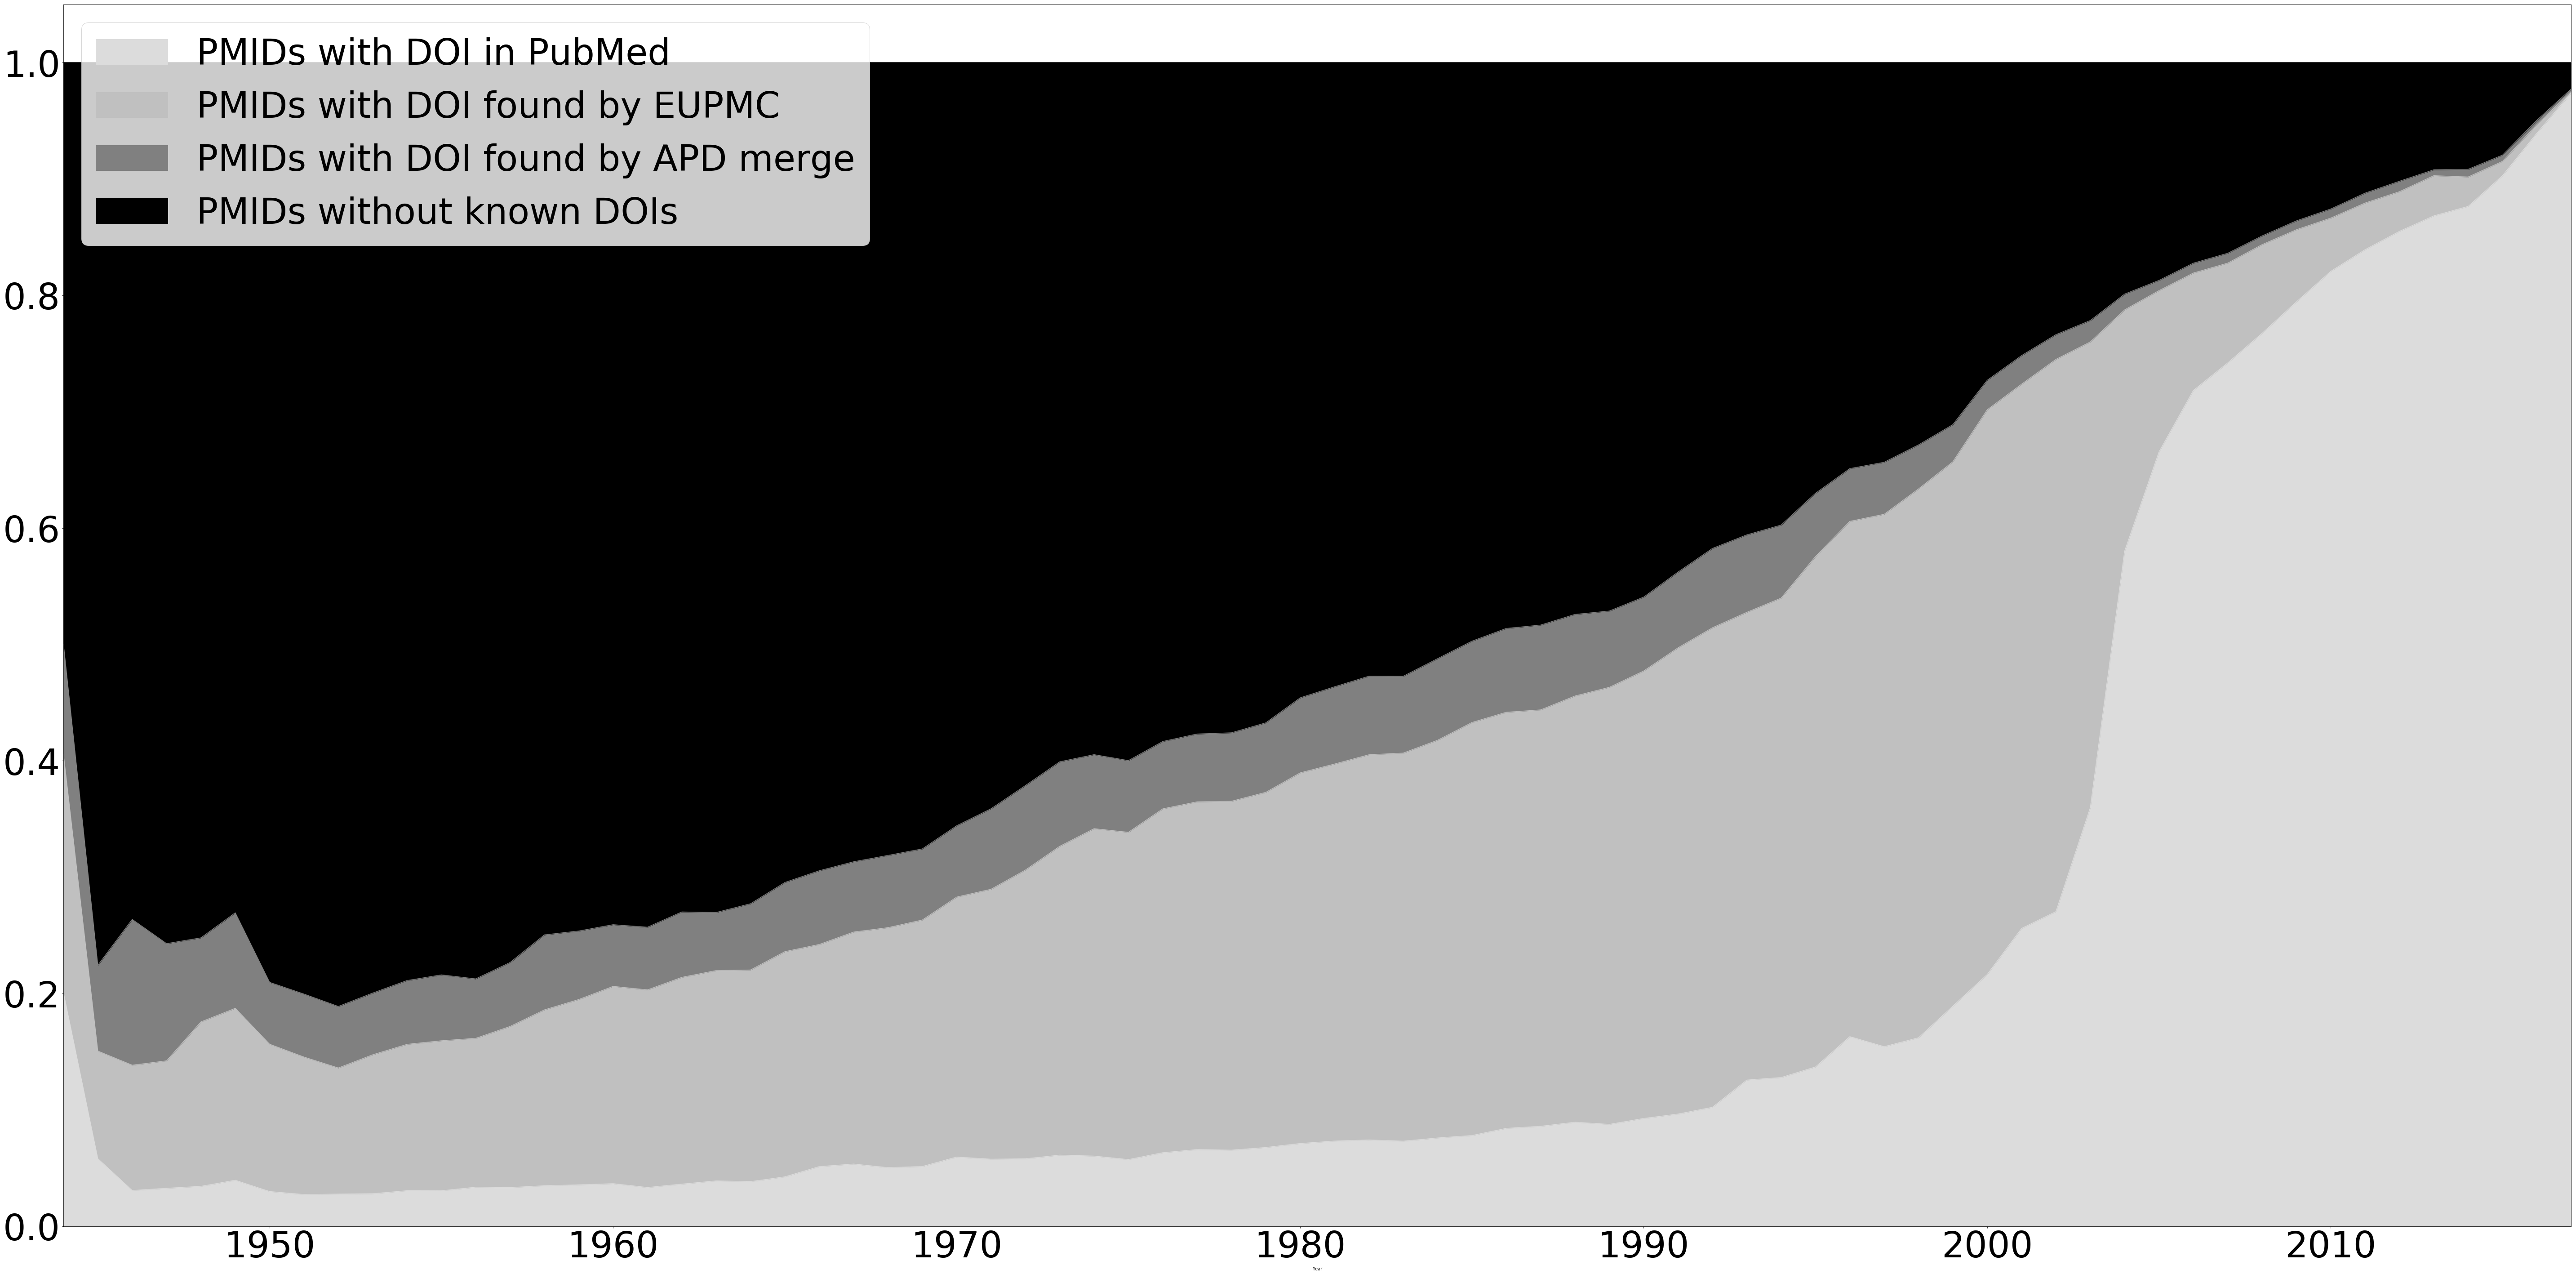

In [32]:
# plot year counts for 1950 ->
# We need to transform the data from raw data to percentage (fraction)
doi_counts_1945_3_perc = doi_counts_1945_3.divide(doi_counts_1945_3.sum(axis=1), axis=0)

myfileoutfig = 'data/results/dois_compare_pubmed_and_eupmc_and_apd_after_1950_percent.png'
ax = doi_counts_1945_3_perc.plot.area(fontsize=80, figsize=(100,50), legend=True, color=['gainsboro', 'silver', 'grey', 'black'])
ax = ax.legend(loc=2, prop={'size': 80})
fig = ax.get_figure()
fig.set_size_inches(100, 50)
fig.savefig(myfileoutfig, dpi=50)

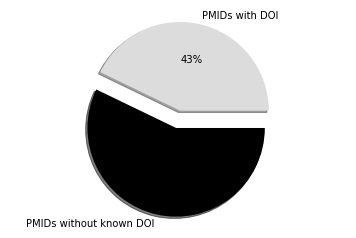

In [33]:
# pie chart 1
myfileoutfig = 'data/results/dois_all_pie_chart.png'
labels = 'PMIDs with DOI', 'PMIDs without known DOI'
sizes = [doi_counts_all['PMIDs with DOI in PubMed'].sum(),
         doi_counts_all['PMIDs without known DOIs in PubMed'].sum() ]
explode = (0.1, 0.1)  # only "explode" the 2nd slice (i.e. 'Hogs')
colors = ['gainsboro', 'black']
fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.f%%',
        shadow=True, startangle=0, colors=colors)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

fig1.savefig(myfileoutfig, dpi=100)
plt.show()

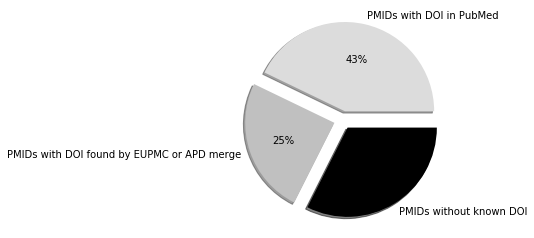

In [34]:
# pie chart 2
myfileoutfig = 'data/results/dois_all_eupmc_or_apd_pie_chart.png'
labels = 'PMIDs with DOI in PubMed', 'PMIDs with DOI found by EUPMC or APD merge', 'PMIDs without known DOI'
sizes = [doi_counts_all['PMIDs with DOI in PubMed'].sum(),
         doi_counts_all['PMIDs with DOI found by EUPMC or APD merge'].sum(),
         doi_counts_all['PMIDs without known DOIs'].sum() ]
explode = (0.1, 0.1, 0.1)  # only "explode" the 2nd slice (i.e. 'Hogs')
colors = ['gainsboro', 'silver', 'black']
fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.f%%',
        shadow=True, startangle=0, colors=colors)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

fig1.savefig(myfileoutfig, dpi=100)
plt.show()

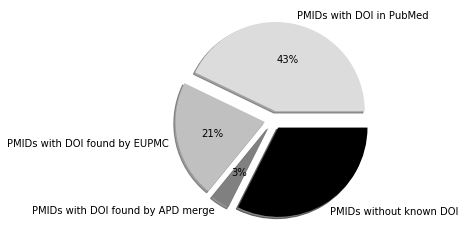

In [35]:
# pie chart 3
myfileoutfig = 'data/results/dois_all_eupmc_and_apd_distinct_pie_chart.png'
labels = 'PMIDs with DOI in PubMed', 'PMIDs with DOI found by EUPMC', 'PMIDs with DOI found by APD merge', 'PMIDs without known DOI'
sizes = [doi_counts_all2['PMIDs with DOI in PubMed'].sum(),
         doi_counts_all2['PMIDs with DOI found by EUPMC'].sum(),
         doi_counts_all2['PMIDs with DOI found by APD merge'].sum(),
         doi_counts_all2['PMIDs without known DOIs'].sum() ]
explode = (0.1, 0.1, 0.1, 0.1)  # only "explode" the 2nd slice (i.e. 'Hogs')
colors = ['gainsboro', 'silver', 'grey', 'black']
fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.f%%',
        shadow=True, startangle=0, colors=colors)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

fig1.savefig(myfileoutfig, dpi=100)
plt.show()

In [36]:
# DOIs for articles before 2000 _b2000 = doi_counts_all2.loc[]
doi_counts_all = doi_counts_all.reset_index()

In [37]:
doi_counts_all

Year  PMIDs without known DOIs  PMIDs with DOI in PubMed  \
0    1781                      69.0                       0.0   
1    1782                      22.0                       0.0   
2    1783                      26.0                       0.0   
3    1784                      31.0                       0.0   
4    1785                      43.0                       0.0   
5    1786                      60.0                       0.0   
6    1787                      43.0                       0.0   
7    1788                      33.0                       0.0   
8    1789                      32.0                       0.0   
9    1790                      45.0                       0.0   
10   1791                      19.0                       0.0   
11   1792                      33.0                       0.0   
12   1793                      17.0                       0.0   
13   1794                      18.0                       0.0   
14   1795                      13.0                       0.0   
15   1797                      27.0                       0.0   
16   1800                      25.0                       0.0   
17   1809                       3.0                       0.0   
18   1811                       7.0                       0.0   
19   1812                       4.0                       0.0   
20   1813                       4.0                       0.0   
21   1814                       9.0                       0.0   
22   1815                       5.0                       0.0   
23   1816                       5.0                       0.0   
24   1817                       4.0                       0.0   
25   1818                       5.0                       0.0   
26   1819                       4.0                       0.0   
27   1821                       5.0                       0.0   
28   1823                       7.0                       0.0   
29   1827                       5.0                       0.0   
..    ...                       ...                       ...   
187  1988                  183279.0                   34561.0   
188  1989                  189518.0                   35222.0   
189  1990                  188273.0                   37987.0   
190  1991                  180561.0                   39789.0   
191  1992                  174162.0                   42662.0   
192  1993                  172849.0                   53514.0   
193  1994                  173927.0                   55948.0   
194  1995                  165824.0                   61338.0   
195  1996                  159646.0                   74579.0   
196  1997                  156454.0                   70320.0   
197  1998                  155462.0                   76671.0   
198  1999                  153308.0                   93232.0   
199  2000                  144585.0                  114627.0   
200  2001                  136556.0                  138827.0   
201  2002                  130474.0                  150921.0   
202  2003                  129301.0                  209818.0   
203  2004                  123175.0                  359280.0   
204  2005                  122703.0                  436225.0   
205  2006                  117832.0                  491057.0   
206  2007                  116190.0                  526142.0   
207  2008                  111699.0                  575444.0   
208  2009                  106482.0                  622026.0   
209  2010                  103389.0                  674473.0   
210  2011                   98050.0                  733828.0   
211  2012                   95670.0                  802426.0   
212  2013                   91500.0                  862675.0   
213  2014                   95497.0                  912865.0   
214  2015                   86504.0                  982492.0   
215  2016                   54545.0                 1034698.0   
216  2017                   25892.0     

In [38]:
doi_counts_all_b2000 = doi_counts_all.loc[doi_counts_all['Year'] < 2000]
doi_counts_all_b2000

Year  PMIDs without known DOIs  PMIDs with DOI in PubMed  \
0    1781                      69.0                       0.0   
1    1782                      22.0                       0.0   
2    1783                      26.0                       0.0   
3    1784                      31.0                       0.0   
4    1785                      43.0                       0.0   
5    1786                      60.0                       0.0   
6    1787                      43.0                       0.0   
7    1788                      33.0                       0.0   
8    1789                      32.0                       0.0   
9    1790                      45.0                       0.0   
10   1791                      19.0                       0.0   
11   1792                      33.0                       0.0   
12   1793                      17.0                       0.0   
13   1794                      18.0                       0.0   
14   1795                      13.0                       0.0   
15   1797                      27.0                       0.0   
16   1800                      25.0                       0.0   
17   1809                       3.0                       0.0   
18   1811                       7.0                       0.0   
19   1812                       4.0                       0.0   
20   1813                       4.0                       0.0   
21   1814                       9.0                       0.0   
22   1815                       5.0                       0.0   
23   1816                       5.0                       0.0   
24   1817                       4.0                       0.0   
25   1818                       5.0                       0.0   
26   1819                       4.0                       0.0   
27   1821                       5.0                       0.0   
28   1823                       7.0                       0.0   
29   1827                       5.0                       0.0   
..    ...                       ...                       ...   
169  1970                  143855.0                   13055.0   
170  1971                  143338.0                   12893.0   
171  1972                  141498.0                   13214.0   
172  1973                  138838.0                   14129.0   
173  1974                  139735.0                   14177.0   
174  1975                  149302.0                   14270.0   
175  1976                  148677.0                   16121.0   
176  1977                  151097.0                   17262.0   
177  1978                  156789.0                   17814.0   
178  1979                  159784.0                   19076.0   
179  1980                  152943.0                   19935.0   
180  1981                  151934.0                   20739.0   
181  1982                  155571.0                   21894.0   
182  1983                  163001.0                   22610.0   
183  1984                  162798.0                   24126.0   
184  1985                  166474.0                   26117.0   
185  1986                  169753.0                   29378.0   
186  1987                  177607.0                   31584.0   
187  1988                  183279.0                   34561.0   
188  1989                  189518.0                   35222.0   
189  1990                  188273.0                   37987.0   
190  1991                  180561.0                   39789.0   
191  1992                  174162.0                   42662.0   
192  1993                  172849.0                   53514.0   
193  1994                  173927.0                   55948.0   
194  1995                  165824.0                   61338.0   
195  1996                  159646.0                   74579.0   
196  1997                  156454.0                   70320.0   
197  1998                  155462.0                   76671.0   
198  1999                  153308.0     

In [39]:
doi_counts_all_b2000['PMIDs with DOI in PubMed'].sum()

1182478.0

In [40]:
# Open pmids and years file
myfilein = 'data/results/pmid_years_all.csv.gz'
pmids_years = pd.read_csv(myfilein, sep='\t', header=0, encoding='utf-8', compression='gzip')
pmids_years

pmid  year
0                1  1975
1                2  1975
2                3  1975
3                4  1975
4                5  1975
5                6  1975
6                7  1975
7                8  1975
8                9  1975
9               10  1975
10              11  1975
11              12  1975
12              13  1975
13              14  1975
14              15  1975
15              16  1975
16              17  1975
17              18  1975
18              19  1975
19              20  1975
20              21  1975
21              22  1975
22              23  1975
23              24  1975
24              25  1975
25              26  1975
26              27  1975
27              28  1975
28              29  1975
29              30  1975
...            ...   ...
27837510  29172271  2017
27837511  29172272  2017
27837512  29172273  2017
27837513  29172274  2017
27837514  29172275  2017
27837515  29172276  2017
27837516  29172277  2017
27837517  29172278  2017
27837518  29172279  2017
27837519  29172280  2017
27837520  29172281  2017
27837521  29172282  2017
27837522  29172283  2017
27837523  29172284  2017
27837524  29172285  2017
27837525  29172286  2017
27837526  29172287  2017
27837527  29172288  2017
27837528  29172289  2017
27837529  29172290  2017
27837530  29172291  2017
27837531  29172292  2017
27837532  29172293  2017
27837533  29172294  2017
27837534  29172295  2017
27837535  29172296  2017
27837536  29172297  2017
27837537  29172298  2016
27837538  29172299  2017
27837539  29172300  2017

[27837540 rows x 2 columns]

In [41]:
pmids_years = pmids_years.loc[pmids_years['pmid'] <= 29172300]

In [42]:
# dedup file
pmids_years = pmids_years.drop_duplicates(subset='pmid')

In [43]:
# PMID total nomber
pmids_years.shape

(27836723, 2)

In [44]:
pmids_years_b2000 = pmids_years.loc[pmids_years['year'] < 2000]
pmids_years_b2000['pmid'].count()

13411620

In [45]:
# DOIs in PMIDs before 2000
1182478 / 13411620

0.08816817058640194

In [46]:
# PMIDs with DOIs in PubMed = DOIs before merge with PMC / APD data = 11931616
# DOIs after merge = 19441925
# DOIs added = 19441925 - 11931616
19441925 - 11931616

7510309

In [47]:
11931616 / 27836723

0.42862861407932246

In [48]:
# PMIDs in 2017 : 1142932
pmids_years.loc[pmids_years['year'] == 2017]['pmid'].count()


1142932

In [49]:
# PMIDs with DOIs in PubMed in 2017: 1113039
# PMIDs without DOIs in PubMed in 2017: 29893
1113039 / 1142932

0.9738453381303525

In [50]:
# PMIDs in 2000 : 529687
pmids_years.loc[pmids_years['year'] == 2000]['pmid'].count()


529687

In [51]:
# PMIDs with DOIs in PubMed in 2000: 114627
# PMIDs without DOIs in PubMed in 2017: 415060
114627 / 529687

0.21640516002846966